# ========================================
# INTERPRETABILIDAD DE MODELOS PREDICTIVOS
# USANDO LIME Y SHAP
# ========================================

### Evaluación Modular - Módulo 9
---

## *Objetivo*

Aplicar herramientas de explicabilidad de modelos, específicamente LIME y SHAP, para analizar y justificar el comportamiento de un modelo de clasificación.

---
## *Contexto*

Imagina que formas parte del equipo de ciencia de datos de una organización que usa inteligencia artificial para apoyar decisiones críticas. Estas decisiones deben ser comprensibles para personas no técnicas (clientes, médicos, auditores, usuarios finales). Por ello, el desafío no es solo construir un modelo preciso, sino también explicable y responsable.

---

## *Resumen*

*El análisis de un modelo de Random Forest para predecir enfermedades cardíacas utilizando herramientas de interpretabilidad como SHAP y LIME ha revelado que, aunque el modelo tiene una alta precisión general (88.6%), su lógica interna es defectuosa y potencialmente peligrosa. La interpretabilidad demostró que el modelo se apoya en variables clínicamente válidas y de peso, como los patrones de ECG durante el ejercicio, la angina y la frecuencia cardíaca máxima. Sin embargo, también se descubrió una falla crítica: el modelo interpreta de manera inconsistente y anómala la variable Colesterol, tratando los valores bajos como un factor de riesgo significativo y los altos como protectores. Esta inconsistencia, probablemente causada por errores de entrada de datos (valores de 0.0), llevó a predicciones incorrectas en casos específicos, generando falsos positivos a pesar de que el paciente no presentaba una enfermedad cardíaca. Este proyecto subraya que la precisión no es suficiente en áreas críticas como la salud. Sin interpretabilidad, no se podría auditar la lógica del modelo, identificar sus sesgos y vulnerabilidades, o comprender por qué falla en casos particulares, lo que demuestra que la transparencia y la responsabilidad son esenciales para la implementación segura y ética de la inteligencia artificial.*

---

## ✍️ *Autor*

`Claudio Andrés Díaz Vargas`


---

# Introducción

En la era de la inteligencia artificial, la capacidad de un modelo para predecir con precisión se ha convertido en el estándar de oro. Sin embargo, en campos críticos como la medicina, donde las decisiones pueden impactar vidas humanas, la precisión por sí sola no es suficiente. Es aquí donde la interpretabilidad de los modelos de IA emerge como una necesidad fundamental.

Este proyecto se adentrará en el fascinante mundo de la inteligencia artificial explicable (XAI), utilizando las poderosas herramientas LIME y SHAP para desvelar el funcionamiento interno de un modelo predictivo de enfermedades cardíacas. Más allá de evaluar su rendimiento a través de métricas tradicionales, nuestro objetivo es examinar cómo el modelo llega a sus conclusiones. Anticipamos que, al igual que una caja negra, el modelo oculta no solo su brillantez, sino también sus vulnerabilidades.

A través de este análisis, no solo identificaremos los factores clínicos que realmente influyen en la predicción, sino que también expondremos las incoherencias lógicas y los sesgos que podrían comprometer la seguridad del paciente. El verdadero propósito de este estudio es demostrar que, sin la interpretabilidad, un modelo que predice correctamente pero por las razones equivocadas es tan peligroso como un modelo que simplemente falla.

## Descripción del proyecto

El proyecto de **Interpretación de Modelos Predictivos usando LIME y SHAP** tiene como objetivo fundamental trascender la mera evaluación de rendimiento para profundizar en el funcionamiento interno de un modelo de clasificación de enfermedades cardíacas. En el ámbito médico, donde las decisiones tienen un impacto directo en la vida de los pacientes, la precisión por sí sola no es suficiente. Por ello, el enfoque de este trabajo no es optimizar el modelo para alcanzar la máxima exactitud, sino **exponer las falencias**, **incoherencias** e **inconsistencias** que comete al clasificar, visibilizando así el peligro de los modelos opacos o "caja negra".

Para este fin, se entrenó un modelo **Random Forest** con el dataset "Heart Failure Prediction", utilizando variables clínicas, fisiológicas y demográficas. Si bien el modelo arrojó métricas de rendimiento prometedoras (alta precisión y F1-score), en lugar de proceder con un modelo optimizado y limpio —como se haría en un entorno ideal tras la imputación y limpieza de datos anómalos—, decidimos deliberadamente mantener los datos y el modelo tal cual, para **mostrar a secas las deficiencias que el modelo comete al clasificar**.

A través de las herramientas de inteligencia artificial explicable **SHAP** y **LIME**, se llevaron a cabo análisis exhaustivos que revelaron:

* **Lógica Inconsistente**: El modelo, en múltiples casos, tomó decisiones basadas en lógicas contradictorias. Por ejemplo, en los casos de **falsos negativos**, ignoró la presencia de síntomas de riesgo claros y se basó en factores anómalos, como un nivel de colesterol de 0, para clasificar incorrectamente al paciente como sano.

* **Vulnerabilidad a Datos Anómalos**: La variable `Cholesterol` fue el punto más crítico. Los análisis SHAP demostraron que el modelo aprendió una relación ilógica con esta variable, asociando valores bajos a un mayor riesgo y valores altos a un menor riesgo. Esta grave inconsistencia resalta la fragilidad del modelo ante errores en los datos.

* **Identificación de Sesgos**: El análisis de los pesos de las variables sensibles `Age` y `Sex` confirmó que el modelo utiliza el sexo como un factor más influyente que la edad, lo que podría reflejar un sesgo en los datos de entrenamiento que, de no ser analizado, podría llevar a un tratamiento diferenciado.

Este proyecto evidencia que un modelo que predice "correctamente" por razones equivocadas es tan peligroso como uno que falla. Se demuestra que la **interpretabilidad es una fase indispensable** del ciclo de vida del aprendizaje automático, no solo para mejorar el rendimiento, sino para garantizar que las decisiones de IA sean responsables, justas y transparentes, especialmente en aplicaciones con un impacto tan significativo en la vida de las personas.

## Descripción de los datos

El dataset “Heart Failure Prediction” es un conjunto de datos clínicos que busca predecir el riesgo de enfermedad cardíaca en pacientes adultos mediante características demográficas, fisiológicas y de pruebas médicas. Contiene 918 registros y 11 variables (más el target `HeartDisease`), incluyendo edad, sexo, tipo de dolor torácico, presión arterial en reposo, colesterol, frecuencia cardíaca máxima, glucemia en ayunas, resultados de ECG, angina inducida por ejercicio, depresión del segmento ST y pendiente del ST. Las variables combinan numéricas continuas, categóricas y binarias, y las más sensibles son `Age` y `Sex`. Los datos provienen de Kaggle: `Heart Failure Prediction Dataset`
, y están destinados a análisis predictivo y explicable de riesgo cardiovascular.

El tipo de problema es de clasificación binaria donde:

* `1`: corresponde a paciente con riesgo de enfermedad cardíaca (presencia de la enfermedad)

* `0`: corresponde paciente sin riesgo de enfermedad cardíaca (ausencia de la enfermedad)

A continuación detallaremos cada una de las 11 variables involucradas:

| Variable         | Tipo                 | Descripción / Naturaleza                                                                                      |
| ---------------- | -------------------- | ------------------------------------------------------------------------------------------------------------- |
| `Age`            | Numérica (continua)  | Edad del paciente en años                                                                                     |
| `Sex`            | Categórica (binaria) | Sexo del paciente (`M` = masculino, `F` = femenino)                                                           |
| `ChestPainType`  | Categórica           | Tipo de dolor torácico: `TA` (típico angina), `ATA` (atípico angina), `NAP` (no angina), `ASY` (asintomático) |
| `RestingBP`      | Numérica (continua)  | Presión arterial en reposo (mmHg)                                                                             |
| `Cholesterol`    | Numérica (continua)  | Nivel de colesterol sérico (mg/dl)                                                                            |
| `FastingBS`      | Binaria              | Glucemia en ayunas > 120 mg/dl (`1`=sí, `0`=no)                                                               |
| `RestingECG`     | Categórica           | Resultados ECG en reposo: `Normal`, `ST`, `LVH`                                                               |
| `MaxHR`          | Numérica (continua)  | Frecuencia cardíaca máxima alcanzada durante prueba de esfuerzo                                               |
| `ExerciseAngina` | Binaria              | Angina inducida por ejercicio (`Y`/`N`)                                                                       |
| `Oldpeak`        | Numérica (continua)  | Depresión del ST inducida por ejercicio en comparación con reposo                                             |
| `ST_Slope`       | Categórica           | Pendiente del segmento ST durante ejercicio (`Up`, `Flat`, `Down`)                                            |
| `HeartDisease`   | Binaria (target)     | Presencia de enfermedad cardíaca (`1`=sí, `0`=no)                                                             |


#### Naturaleza de las variables:

* Numéricas continuas: `Age`, `RestingBP`, `Cholesterol`, `MaxHR`, `Oldpeak`.

* Categorías ordinales / nominales: `ChestPainType`, `RestingECG`, `ST_Slope`.

* Binarias: `Sex`, `FastingBS`, `ExerciseAngina`, `HeartDisease`.


# Desarrollo

En este apartado mostramos todos los resultados obtenidos a partir de los análisis aplicados a los datos, considerando herramientas estadísticas atingentes a este enfoque y, para posteriormente, dar pie a conclusiones concretas y precisas.

## 1. Carga y exploración del dataset (conjunto de datos)

Se importan y cargan las librerías necesarias para ejecutar los códigos que se requieren utilizar en este apartado como: `os`, `pandas`, `numpy` y `matplotlib.pyplot`. Luego se pretende conocer las dimensiones, estructura, valores nulos y duplicados. Y, además conocer la distribución de la variable objetivo `HeartDisease` y el balance de clase.

### 1.1 Dimensiones y estructura

El siguiente cuadro de código nos permite cargar el archivo `.csv`, visualizar rápidamente las primeras 5 filas del conjunto de datos y, además, conocer las estadísticas descriptivas de cada variable para saber información de su distribución.

In [175]:
# 1_carga_exploracion
# -*- coding: utf-8 -*-
"""
Carga y exploración mínima del dataset 'Heart Failure Prediction'.
Sigue estos pasos: (1) intenta cargar varios nombres de archivo comunes, (2) inspección básica,
(3) limpieza mínima (nulos, dtypes), (4) identificación de variables sensibles.
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------- 1) Cargar el CSV ----------
candidates = [
    "heart.csv",
    "heart_disease.csv",
    "heart-disease.csv",
    "heart_failure_clinical_records_dataset.csv",
    "heart_failure_prediction.csv",
    "heart-failure-prediction.csv"
]

df = None
for fname in candidates:
    if os.path.exists(fname):
        df = pd.read_csv(fname)
        print(f">>> Archivo cargado: {fname}")
        break

if df is None:
    raise FileNotFoundError(
        "No se encontró el CSV en el directorio de trabajo. "
        "Descarga el archivo desde Kaggle y colócalo en este directorio. "
        "Nombres de archivo buscados: " + ", ".join(candidates)
    )

# ---------- 2) Vista rápida y propiedades ----------
print("\n-- Dimensiones (filas, columnas):", df.shape)
print("\n-- 5 primeras filas:")
display(df.head())      # en Jupyter; si es script, usa print(df.head().to_string())

print("\n-- Info (dtypes y no-null counts):")
print(df.info())

print("\n-- Estadísticas descriptivas (numéricas):")
print(df.describe().transpose())



>>> Archivo cargado: heart.csv

-- Dimensiones (filas, columnas): (918, 12)

-- 5 primeras filas:


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0


-- Info (dtypes y no-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

-- Estadísticas descriptivas (numéricas):
              count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.43

Podemos ver que el conjunto de datos a utilizar cuenta con un registro de 918 pacientes y con 12 variables en donde:

* 11 son características propias

* 1 variable objetivo, la cual es la variable que se pretenden predecir mediante un modelo que generaremos más adelante.

Con respecto a las estadísticas descriptivas entregadas podemos observar que:

* Edad (`Age`): media 53.5 años, rango 28–77 → población adulta media/alta.

* Presión arterial (`RestingBP`): media 132 mmHg, rango 0–200 → cuidado con valores extremos (0 es clínicamente improbable, probablemente error).

* Colesterol (`Cholesterol`): media 198 mg/dl, rango 0–603 → algunos valores extremos pueden requerir revisión o normalización.

* Frecuencia cardíaca máxima (`MaxHR`): media 136 bpm, rango 60–202 → amplio rango según condición física.

* Depresión ST (`Oldpeak`): media 0.88, rango -2.6–6.2 → indica que hay pacientes con valores atípicos, pero reflejan variabilidad clínica.

* `FastingBS`: 23% tienen glucosa elevada (>120 mg/dl).


### 1.2 Tipos de variable (numéricas / categóricas)

El siguiente cuadro de código permite mostrar qué variables pertenecen al conjunto de columnas numérica y qué, al conjunto de columnas categóricas.

In [179]:
# ---------- 4) Tipos de variable (numéricas / categóricas) ----------
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# También columnas booleanas representadas como 0/1
print("\n-- Columnas numéricas:", num_cols)
print("\n-- Columnas categóricas (object/category):", cat_cols)




-- Columnas numéricas: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

-- Columnas categóricas (object/category): ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


Tenemos que, 7 variables de los 12 en total son de tipo numérico y 5 de tipo categórico.

### 1.3 Visibilización de valores nulos y duplicados

En el siguiente cuadro de código contabilizamos el número de valores nulos o faltantes presentes en el conjunto de datos (registro erróneo u de omisión de algún paciente) y visibilizar además de alguna presencia de datos duplicados, por si las hay. 

**Destacar que, el presente proceso es simple, no hay profundidad de análisis de limpieza, sino aplicando lo mínimo requerido solamente**.

In [177]:
# ---------- 3) Valores nulos y duplicados ----------
null_counts = df.isnull().sum()
null_pct = (null_counts / len(df) * 100).round(2)
print("\n-- Valores nulos por columna (count, %):")
print(pd.concat([null_counts, null_pct], axis=1).rename(columns={0: "nulos", 1: "%"}))

dup_count = df.duplicated().sum()
print(f"\n-- Filas duplicadas: {dup_count}")




-- Valores nulos por columna (count, %):
                nulos    %
Age                 0  0.0
Sex                 0  0.0
ChestPainType       0  0.0
RestingBP           0  0.0
Cholesterol         0  0.0
FastingBS           0  0.0
RestingECG          0  0.0
MaxHR               0  0.0
ExerciseAngina      0  0.0
Oldpeak             0  0.0
ST_Slope            0  0.0
HeartDisease        0  0.0

-- Filas duplicadas: 0


Los resutados nos muestra que el conjunto de datos no presenta valores nulos lo que no hace "falta imputación". Tampoco presenta valores duplicados por lo que los datos están limpios.

### 1.4 Aplicación de Limpieza mínima sugerida

A sabiendas de lo anterior, si bien nos mostró que no hay presencia de valores nulos o faltantes ni de duplicados en el conjunto de datos, de todas formas, aplicamos igual la limpieza mínima requerida.

In [181]:
# ---------- 5) Limpieza mínima sugerida ----------
# Ejemplo de conversiones: mapear columnas binarias a tipo bool si existen
binary_candidates = ["sex", "diabetes", "smoking", "high_blood_pressure", "hypertension",
                     "anaemia", "exang", "fbs", "target", "death_event"]
for col in binary_candidates:
    if col in df.columns:
        # si está 0/1, convertimos a int (o bool)
        if set(df[col].dropna().unique()) <= {0, 1, True, False}:
            df[col] = df[col].astype('int')  # o .astype(bool) si preferís
            print(f"  - Convertida columna binaria: {col} -> int")

# Eliminar columnas totalmente vacías (si existieran)
empty_cols = [c for c in df.columns if df[c].isna().all()]
if empty_cols:
    print("Columnas totalmente vacías (se eliminarán):", empty_cols)
    df.drop(columns=empty_cols, inplace=True)

# Opcional: eliminar duplicados
if dup_count > 0:
    df = df.drop_duplicates()
    print(f"  - Duplicados eliminados. Nuevo shape: {df.shape}")



### 1.5 Distribución de la variable objetivo y balance de clases

El siguiene cuadro de código nos permitirá conocer la distribución de la variable objetivo `HeartDisease` Enfermedad Cardíaca. 

In [183]:
# ---------- 6) Distribución de la variable objetivo y balance de clases ----------
# Intentamos detectar nombres comunes de la target
target_candidates = ["target","heart_disease","HeartDisease","death_event"]
target_col = None
for c in target_candidates:
    if c in df.columns:
        target_col = c
        break

if target_col:
    print(f"\n-- Distribución de la variable objetivo '{target_col}':")
    print(df[target_col].value_counts(dropna=False))
    print((df[target_col].value_counts(normalize=True)*100).round(2))
else:
    print("\n-- No detecté automáticamente la columna objetivo entre:", target_candidates)




-- Distribución de la variable objetivo 'HeartDisease':
HeartDisease
1    508
0    410
Name: count, dtype: int64
HeartDisease
1    55.34
0    44.66
Name: proportion, dtype: float64


En el resultado podemos observar que la variable objetivo `HeartDisease` presenta una distribución ligeramente desbalanceada ya que:

* `1` (con enfermedad): tiene 508 pacientes lo que equivale al 55.3%.

* `0` (sin enfermedad): tiene 410 pacientes lo que equivale al 44.7%.

Esto implica que el modelo debe manejar este leve desbalance, por ejemplo usando `class_weight` o métricas robustas como F1-score.

### 1.6  Exploración rápida de valores únicos para columnas relevantes

En el siguiente cuadro de código realizamos una inspección de la existencia de algún valor único presente en algunas de las columnas (característica) del conjunto de datos. Como por ejemplo, detectar valores sospechosos o errores antes de modelar.

In [185]:
# ---------- 7) Exploración rápida de categorical / valores únicos para columnas relevantes ----------
to_inspect = ["sex", "age", "chest_pain_type", "resting_bp", "cholesterol",
              "fasting_blood_sugar", "rest_ecg", "max_heart_rate", "exercise_induced_angina",
              "oldpeak", "slope"]
print("\n-- Valores únicos / ejemplos (si las columnas existen):")
for c in to_inspect:
    if c in df.columns:
        print(f"\n  Columna '{c}': n_unique={df[c].nunique()}")
        if df[c].nunique() <= 20:
            print(df[c].value_counts(dropna=False))
        else:
            print("  (muchos valores; mostrar estadísticos numéricos)")
            print(df[c].describe())




-- Valores únicos / ejemplos (si las columnas existen):


Como podemos observar en el resultado anterior, no las hay. No hay valores únicos en las variables relevantes.

### 1.7 Correlación numérica entre las variables y mapa de calor (`Heatmap`)

En el siguiente cuadro de código se construye una matriz de correlación numérica de las primeras 10 filas mostrando en términos numéricos la relación que podría tener entre las variables. Y, además se genera un mapa de calor (`Heatmap`) para visualizar los resultados de manera más general. 


-- Matriz de correlación (numéricas) (primeras 10 filas):
                Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  \
Age           1.000      0.254       -0.095      0.198 -0.382    0.259   
RestingBP     0.254      1.000        0.101      0.070 -0.112    0.165   
Cholesterol  -0.095      0.101        1.000     -0.261  0.236    0.050   
FastingBS     0.198      0.070       -0.261      1.000 -0.131    0.053   
MaxHR        -0.382     -0.112        0.236     -0.131  1.000   -0.161   
Oldpeak       0.259      0.165        0.050      0.053 -0.161    1.000   
HeartDisease  0.282      0.108       -0.233      0.267 -0.400    0.404   

              HeartDisease  
Age                  0.282  
RestingBP            0.108  
Cholesterol         -0.233  
FastingBS            0.267  
MaxHR               -0.400  
Oldpeak              0.404  
HeartDisease         1.000  


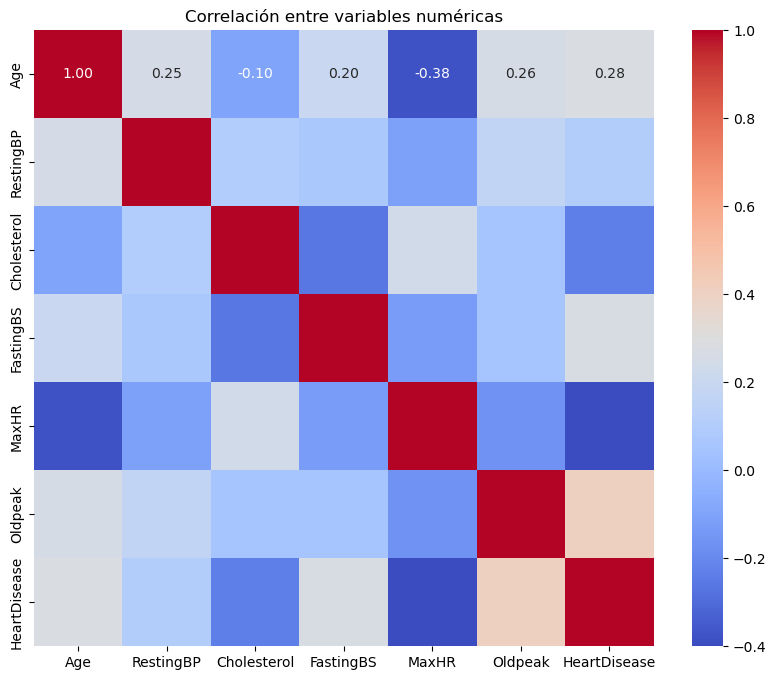

In [96]:
# ---------- 8) Correlaciones (numéricas) - ayuda para selección de features ----------
if len(num_cols) >= 2:
    corr = df[num_cols].corr()
    print("\n-- Matriz de correlación (numéricas) (primeras 10 filas):")
    print(corr.iloc[:10, :10].round(3))
    # Si estás en Jupyter, puedes descomentar para visualizar heatmap:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlación entre variables numéricas")
plt.show()



### *Interpretación de los resultados:*

---

En el gráfico de calor (`heatmap`) anterior, podemos observar el nivel de correlación que presenta una variable con otra y, se debe interpretar de la siguiente manera:

* Posee un rango entre 1.0 y -4.0

* Niveles de correlación elevados que se acercan a 1 o lo igualan (color rojo) presenta una correlación positiva entre las variables involucradas.

* Niveles de correlación cercanos a 0 o que se acercan a este (color celeste con tendencia a blanco), no hay correlación existente entre las variable involucradas.

* Niveles de correlación muy bajas que se acerca a -4.0 o lo igualan (color azul) presenta una correlación negativa entre las variables involucradas. 

---

De acuerdo a los resultados de las correlaciones numéricas, tomaremos en cuenta aquellas correlaciones moderadas con `HeartDisease`:

* `Oldpeak` (0.404) → mayor depresión ST aumenta riesgo.

* `MaxHR` (-0.400) → frecuencia cardíaca máxima baja se asocia con mayor riesgo.

* `Age` (0.282) → riesgo aumenta con la edad.

* `FastingBS` (0.267) → glucemia alta aumenta riesgo.

* `Cholesterol` (-0.233) → correlación negativa leve; podría ser atípica.

`RestingBP` (0.108) → poco correlacionada con enfermedad.

### 1.8 Almacenamiento de los datos limpios obtenidos en formato `.csv`

Con el siguiente código podemos guardar una copia de los datos ya sometidos bajo una limpieza rápida en formato `.csv` con el nombre de `heart_cleaned.csv`. 

In [187]:
# ---------- 9) Guardar una copia "limpia" para los próximos pasos ----------
clean_fname = "heart_cleaned.csv"
df.to_csv(clean_fname, index=False)
print(f"\n>>> Dataframe procesado guardado como: {clean_fname}")



>>> Dataframe procesado guardado como: heart_cleaned.csv


Se confirma el proceso de guardado bajo el nombre de `heart_cleaned.csv`.

## 2. Construcción de modelo predictivo

### 2.1 División de los datos: Entrenamiento y prueba

Con el siguiente cuadro de código nos permite dividir los datos limpios `heart_cleaned` en dos conjuntos: Entrenamiento (80%) y Prueba (20-%).

In [316]:
# -*- coding: utf-8 -*-
"""
División del dataset en entrenamiento y prueba.
"""

import pandas as pd
from sklearn.model_selection import train_test_split

# ---------- 1) Cargar dataset limpio ----------
df = pd.read_csv("heart_cleaned.csv")
print(">>> Dataset cargado con shape:", df.shape)

# ---------- 2) Identificar variable objetivo y features ----------
# En la exploración anterior vimos varios candidatos. Ajusta si en tu CSV la columna se llama distinto.
target_candidates = ["target","heart_disease","HeartDisease","death_event"]
target_col = None
for c in target_candidates:
    if c in df.columns:
        target_col = c
        break

if not target_col:
    raise ValueError("No se detectó columna objetivo. Revisa el CSV y especifica manualmente.")

X = df.drop(columns=[target_col])   # Features
y = df[target_col]                   # Target

print(f">>> Variable objetivo detectada: {target_col}")
print(">>> Variables predictoras (features):", list(X.columns))

# ---------- 3) División entrenamiento / prueba ----------
# Usamos 80% entrenamiento, 20% prueba (típico en clasificación)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% test
    random_state=42,     # semilla para reproducibilidad
    stratify=y           # mantener la proporción de clases
)

print("\n-- Shapes tras la división:")
print("X_train:", X_train.shape, " | y_train:", y_train.shape)
print("X_test :", X_test.shape, " | y_test :", y_test.shape)

# ---------- 4) Guardar datasets divididos para la siguiente etapa ----------
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("\n>>> Archivos guardados: X_train.csv, X_test.csv, y_train.csv, y_test.csv")


>>> Dataset cargado con shape: (918, 12)
>>> Variable objetivo detectada: HeartDisease
>>> Variables predictoras (features): ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

-- Shapes tras la división:
X_train: (734, 11)  | y_train: (734,)
X_test : (184, 11)  | y_test : (184,)

>>> Archivos guardados: X_train.csv, X_test.csv, y_train.csv, y_test.csv


Aquí podemos observar la carga de los datos detectando un registro de 918 pacientes y 12 columnas (características) que son: Mezcla de numéricas (`Age`, `RestingBP`, `Cholesterol`, `MaxHR`, `Oldpeak`, `FastingBS`) y categóricas (`Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, `ST_Slope`). Además, se identificó que la variable objetivo es `HeartDisease` lo cual indica si el paciente presenta (`1`) o no (`0`) una enfermedad cardíaca. Estas variables incluyen datos clínicos, fisiológicos y demográficos que son relevantes para estimar riesgo.

Además, se observa una división entrenamiento/prueba quedando de la siguiente manera:

* Train (entrenamiento): 734 pacientes (~80%).

* Test (prueba): 184 pacientes (~20%).

* Ambas tienen las 11 variables predictoras.

* La variable objetivo (`y_train`, `y_test`) está separada correctamente.

* Este split es estándar y asegura que haya suficientes datos para entrenar y validar.

En general, el dataset fue preparado de forma correcta para modelado: target identificado, features separados, división train/test balanceada (~80/20) y exportación de archivos para asegurar transparencia en el proceso. Ahora se puede avanzar con el entrenamiento del modelo y su evaluación sin riesgo de fuga de información.

### 2.2 Entrenamiento del modelo (Random Forest)

Con el siguiente cuadro de código realizamos el proceso de entrenamiento del modelo sobre los datos de entrenamiento y, visualizamos posteriormente, tanto el reporte de clasificación con las métricas más relevante para su evaluación como también su matriz de confusión para detectar falsos positivos y falsos negativos por parte del modelo y sus predicciones por sobre el conjunto de prueba.

In [191]:
# 3_modelo_entrenamiento_fixed.py
# -*- coding: utf-8 -*-
"""
Entrenamiento Random Forest con codificación de variables categóricas.
"""

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# ---------- 1) Cargar conjuntos de datos ----------
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv").squeeze()
y_test = pd.read_csv("y_test.csv").squeeze()

print(">>> Shapes originales:")
print("X_train:", X_train.shape, "| y_train:", y_train.shape)
print("X_test :", X_test.shape, "| y_test :", y_test.shape)

# ---------- 2) One-Hot Encoding de categóricas ----------
# Detectamos columnas categóricas automáticamente
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print("\nColumnas categóricas detectadas:", cat_cols)

# Aplicamos get_dummies para codificación one-hot (misma base train y test)
X_train_enc = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test_enc  = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# Asegurar que ambas tengan mismas columnas tras la codificación
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

print(">>> Shapes después de encoding:")
print("X_train_enc:", X_train_enc.shape, "| X_test_enc:", X_test_enc.shape)

# ---------- 3) Crear y entrenar modelo ----------
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train_enc, y_train)
print("\n>>> Modelo Random Forest entrenado.")

# ---------- 4) Evaluación ----------
y_pred_train = rf_model.predict(X_train_enc)
y_pred_test = rf_model.predict(X_test_enc)

print("\n-- Métricas en entrenamiento:")
print("Accuracy:", round(accuracy_score(y_train, y_pred_train), 3))
print(classification_report(y_train, y_pred_train))

print("\n-- Métricas en prueba:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_test), 3))
print(classification_report(y_test, y_pred_test))

print("\n-- Matriz de confusión (test):")
print(confusion_matrix(y_test, y_pred_test))

# ---------- 5) Guardar el modelo ----------
joblib.dump(rf_model, "random_forest_model.pkl")
print("\n>>> Modelo guardado como random_forest_model.pkl")


>>> Shapes originales:
X_train: (734, 11) | y_train: (734,)
X_test : (184, 11) | y_test : (184,)

Columnas categóricas detectadas: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
>>> Shapes después de encoding:
X_train_enc: (734, 15) | X_test_enc: (184, 15)

>>> Modelo Random Forest entrenado.

-- Métricas en entrenamiento:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       406

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734


-- Métricas en prueba:
Accuracy: 0.886
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184


### *Interpretación de los resultados:*

Lo anterior, arrojan los siguientes resultados:

* En entrenamiento (train set):

  * Accuracy = 1.0 → 100% de acierto.

  * Todas las métricas (precision, recall, f1) = 1.0.

  * Posible sobreajuste (overfitting), ya que el modelo aprendió perfectamente los datos de entrenamiento.
 
* En prueba (test set):

  * Accuracy = 0.886 (~89%), lo cual es muy bueno para un problema clínico.

  * Clase `0` (sin enfermedad): precision 0.89, recall 0.85 → se confunden algunos pacientes sanos como enfermos (falsos positivos).

  * Clase `1` (con enfermedad): precision 0.89, recall 0.91 → el modelo detecta muy bien a quienes sí tienen enfermedad, aunque comete algunos falsos negativos.

  * Balance entre precision y recall → f1-score ≈ 0.90, muestra un modelo robusto.
 

La matriz de confusión en test tenemos las siguientes observaciones:

* Verdaderos negativos (70): sanos correctamente clasificados.

* Falsos positivos (12): sanos mal clasificados como enfermos.

* Falsos negativos (9): enfermos no detectados (esto es clínicamente más crítico).

* Verdaderos positivos (93): enfermos correctamente detectados.

El modelo tiende a detectar bien la enfermedad (91% recall en clase 1), lo cual es positivo en un contexto médico, aunque aún comete algunos errores.

En conclusión, el modelo Random Forest generaliza bien (89% en test). Aunque, presenta riesgo de sobreajuste porque en entrenamiento tiene 100% accuracy. Se podría controlar ajustando hiperparámetros (max_depth, n_estimators, min_samples_split, etc.).

**Clínicamente: es mejor cometer falsos positivos (12 casos) que falsos negativos (9 casos), pero aún así conviene analizar los `FN` porque representan pacientes enfermos no detectados.**

## 3. Aplicación de SHAP

Aquí aplicamos SHAP para conocer las explicaciones individuales de las variables relvantes para una clase determinada.

### 3.1 Explicaciones individuales (mínimo 3 casos distintos) para la clase 1 (Positiva)

Aquí conoceremos las explicaciones individuales de las variables para 3 casos distintos de pacientes:

* `1° paciente` (`caso #0`): es uno con características de contraer una enfermedad cardíaca (`y_test=1`).

* `2° paciente` (`caso #10`): es uno con características, semejante al primero, de contraer una enfermedad cardíaca (`y_test=1`).

* `3° paciente` (`caso #50`): es uno con características de no contraer una enfermadad cardíaca (`y_test=0`).


>>> Explicación para caso #0 (y_test=1):


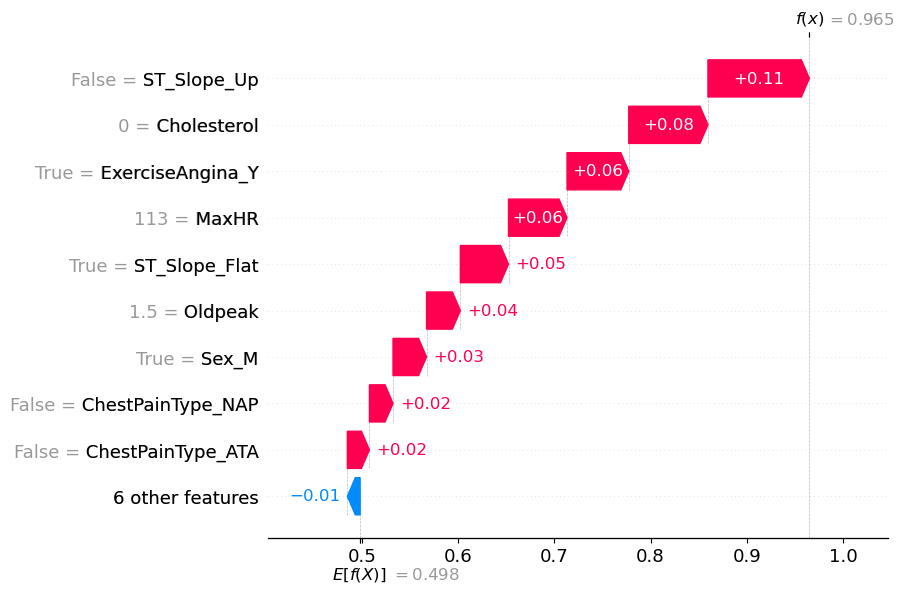


>>> Explicación para caso #10 (y_test=1):


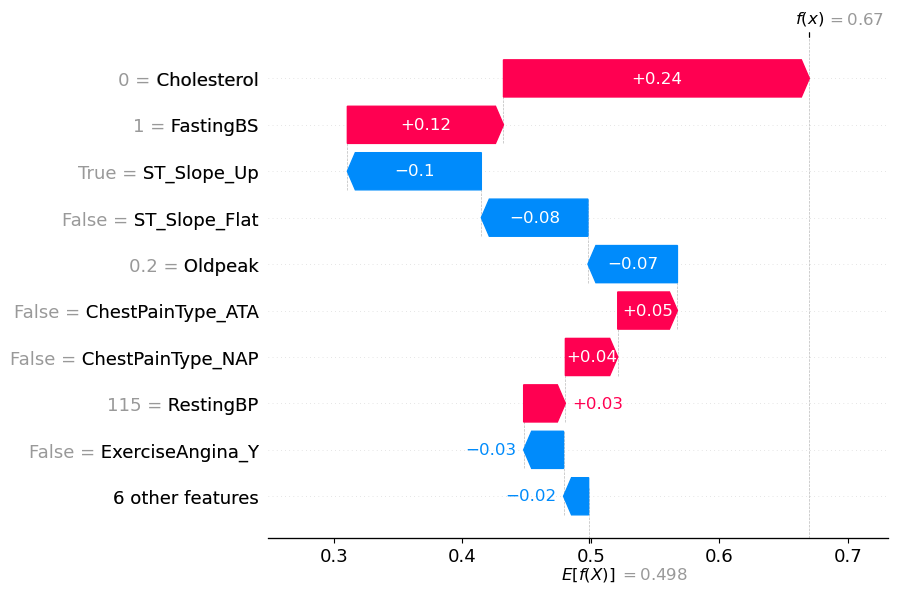


>>> Explicación para caso #50 (y_test=0):


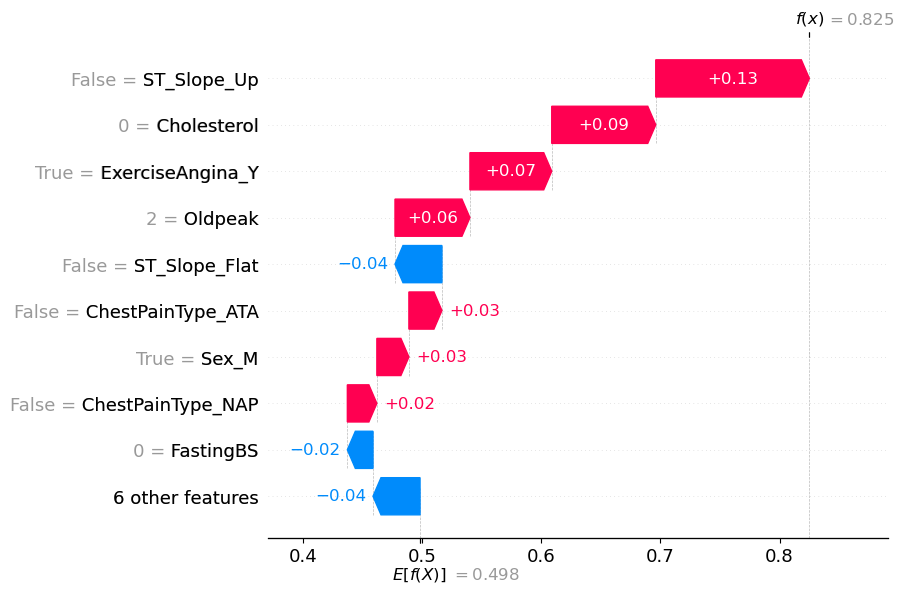

In [319]:
import pandas as pd
import shap
import joblib
import matplotlib.pyplot as plt

# ---------- 1) Cargar datos y modelo ----------
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv").squeeze()
rf_model = joblib.load("random_forest_model.pkl")

# One-hot encoding consistente
cat_cols = X_test.select_dtypes(include=['object']).columns.tolist()
X_test_enc = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

X_train_enc = pd.read_csv("X_train.csv")
cat_cols_train = X_train_enc.select_dtypes(include=['object']).columns.tolist()
X_train_enc = pd.get_dummies(X_train_enc, columns=cat_cols_train, drop_first=True)
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

# ---------- 2) SHAP explainer ----------
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_test_enc)

# ---------- 3) Explicaciones individuales (para clase positiva = 1) ----------
indices = [0, 10, 50]
for i in indices:
    print(f"\n>>> Explicación para caso #{i} (y_test={y_test.iloc[i]}):")
    shap.plots.waterfall(shap_values[i, :, 1], max_display=10)  # elegimos clase 1
    plt.show()


### *Interpretación de los gráficos:*

Según lo entregado en los resultados anterior se desprende lo siguiente:

* **Explicaciones individuales (clase 1 → riesgo positivo) para el caso (paciente) 0**

* La predicción base del modelo es `E[f(x)] = 0.498`, es decir, casi el 50% de probabilidad de enfermedad si no supiéramos nada del paciente.

* Después de sumar los efectos de las variables, la predicción final del modelo para este paciente es f(x) = 0.965 → es decir, el modelo predice con mucha confianza que tiene riesgo positivo de enfermedad cardíaca. 

**Factores que empujan hacia la enfermedad (clase 1, rojo)**

1. `ST_Slope_Up = False` (+0.11): No tener pendiente ascendente del ST es un fuerte riesgo, ya que normalmente una pendiente “Up” se asocia con corazón sano.

2. `Cholesterol = 0` (+0.08): El valor `0` en este dataset significa “dato faltante/registrado como 0”, y el modelo lo está interpretando como alto riesgo (probablemente porque muchos enfermos tienen ese valor).

3. `ExerciseAngina = Y` (Sí) (+0.06): Tener angina inducida por ejercicio aumenta la probabilidad de enfermedad.

4. `MaxHR = 113` (bajo) (+0.06): Una "frecuencia máxima" baja es típica de pacientes con enfermedad coronaria.

5. `ST_Slope_Flat = True` (+0.05): Una pendiente “Flat” es un indicador clásico de riesgo.

6. `Oldpeak = 1.5` (+0.04): Depresión del ST moderada, signo de isquemia.

7. `Sex = M` (+0.03): Ser hombre está asociado a mayor riesgo en este dataset.

8. `ChestPainType_NAP = False` (+0.02): No presentar dolor tipo “NAP” (menos riesgoso) implica que su dolor es más preocupante.

9. `ChestPainType_ATA = False` (+0.02): No tener angina típica de esfuerzo leve también empuja hacia riesgo.

**Factores que empujan hacia no enfermedad (clase 0, azul)**

* `6 other features = -0.01`: Algunas variables menores (no listadas) reducen levemente el riesgo, pero su efecto es insignificante comparado con los factores anteriores.

En conclusión, este paciente tiene un perfil fuertemente riegoso porque:

* No tiene pendiente ascendente del ST.

* Presenta angina con el ejercicio.

* Su frecuencia cardíaca máxima es baja.

* Tiene un valor atípico de colesterol (0).

* Hombre, con depresión ST y pendiente plana.

El modelo casi ignora los pocos factores protectores y lo clasifica con 96.5% de probabilidad de enfermedad cardíaca.

* **Explicaciones individuales (clase 1 → riesgo positivo) para el caso (paciente) 10**

* La predicción base del modelo es `E[f(x)] = 0.498`, es decir, casi el 50% de probabilidad de enfermedad si no supiéramos nada del paciente.

* Después de sumar los efectos de las variables, la predicción final del modelo para este paciente es f(x) = 0.67, es decir, el modelo predice con un 67% de probabilidad de que el paciente tendría un riesgo positivo de enfermedad cardíaca.

**Factores que empujan hacia la enfermedad (clase 1, rojo)**

1. `Cholesterol = 0` (+0.24): El valor `0` en este dataset significa “dato faltante/registrado como 0”, y el modelo lo está interpretando como alto riesgo (probablemente porque muchos enfermos tienen ese valor).

2. `FastingBS = 1` (+0.12): Un valor de `1` indica que el nivel de azúcar en sangre en ayunas del paciente es alto (generalmente mayor a 120 mg/dL). Esto es un factor riesgo para la diabetes y, por lo tanto para enfermedades cardíacas.

3. `ChestPainType_ATA = False` (+0.05): No tener angina típica de esfuerzo leve también empuja hacia riesgo.

3. `ChestPainType_NAP = False` (+0.04): No presentar dolor tipo “NAP” (menos riesgoso) implica que su dolor es más preocupante.

4. `RestingBP = 115` (+0.03): El valor de 115 mmHg, que está en el rango normal, empujó la predicción hacia arriba en solo +0.03. Aunque es un factor de riesgo bajo, el modelo parece haberle asignado una pequeña contribución positiva. Sin embargo, su impacto es muy pequeño en comparación con el colesterol o el azúcar en la sangre. 

**Factores que empujan hacia no enfermedad (clase 0, azul)**

1. `ST_Slope_Up = True` (-0.1): Este es el factor que más empujó la predicción a la baja. La elevación del segmento ST (`ST_Slope_Up`) es generalmente un signo positivo de un corazón sano durante la prueba de ejercicio y redujo la probabilidad en -0.1 puntos.

2. `ST_Slope_Flat = False` (-0.08): El hecho de que el segmento ST no se aplanara durante el ejercicio (`ST_Slope_Flat = False`) también contribuyó a una menor probabilidad de enfermedad cardíaca en -0.08. Esto refuerza el efecto anterior, ya que el aplanamiento del ST es un signo de enfermedad.
 
3. `Oldpeak = 0.2` (-0.07): Este valor bajo de depresión del ST (-0.07) es otro indicador de un corazón más sano en comparación con una depresión más pronunciada. Contribuyó con -0.07, lo que disminuyó la probabilidad de enfermedad cardíaca.

4. `ExerciseAngina_Y = False` (-0.03): El paciente no experimentó angina durante el ejercicio, lo cual es una buena señal y se asocia con un menor riesgo de enfermedad cardíaca y, por ello contribuyó a empujar hacia no contraerlo.

5. `6 other features` (-0.02): Algunas variables menores (no listadas) reducen levemente el riesgo, pero su efecto es insignificante comparado con los factores anteriores.

En conclusión, el paciente tiene una probabilidad final de 67% de padecer una enfermedad cardíaca. Los factores que más contribuyeron a esta alta probabilidad fueron el nivel de colesterol y el alto nivel de azúcar en sangre. Los factores que más ayudaron a reducir el riesgo fueron la elevación del segmento ST durante el ejercicio y el valor bajo de `Oldpeak`.

A pesar de tener una presión arterial normal (115 mmHg), el paciente tiene factores de riesgo significativos que el modelo ha capturado para dar su predicción final.

* **Explicaciones individuales (clase 1 → riesgo positivo) para el caso (paciente) 50**

* La predicción base del modelo es `E[f(x)] = 0.498`, es decir, casi el 50% de probabilidad de enfermedad si no supiéramos nada del paciente.

* Después de sumar los efectos de las variables, la predicción final del modelo para este paciente es f(x) = 0.83, es decir, el modelo predice con un 83% de probabilidad de que el paciente tendría un riesgo positivo de enfermedad cardíaca.

**Importante tener en cuenta: Valor real (`y_test=0`): La anotación "y_test=0" indica que, en realidad, este paciente no tiene una enfermedad cardíaca. Esto nos dice que el modelo hizo una predicción incorrecta (un falso positivo).**

Las barras rojas son los factores que impulsaron la predicción del modelo hacia una enfermedad cardíaca. En este caso, son los principales responsables de la predicción incorrecta.

**Factores que empujan hacia la enfermedad (clase 1, rojo)**

* `ST_Slope_Up = False` (+0.13): Este es el factor más influyente. Indica que el segmento ST del ECG del paciente no se elevó durante el ejercicio. La elevación del ST es un signo de un corazón sano, por lo que su ausencia es una fuerte señal de riesgo para el modelo. Esto empujó la predicción significativamente hacia el lado positivo.

* `Colesterol = 0` (+0.09): De nuevo, el valor de colesterol de 0 aparece como un factor de alto riesgo, lo que sugiere que es un dato anómalo o un error de registro. El modelo lo interpreta como un factor que aumenta mucho el riesgo, lo que es una de las principales razones de la predicción errónea.

* `ExerciseAngina_Y = True` (+0.07): El paciente sí experimentó angina (dolor de pecho) durante el ejercicio. Este es un síntoma clásico de la enfermedad arterial coronaria y, como era de esperar, impulsó la predicción hacia un resultado positivo.

* `Oldpeak = 2` (+0.06): Una depresión del segmento ST de 2 mm es un signo de isquemia moderada, lo que se asocia con un mayor riesgo de enfermedad cardíaca. Este factor contribuyó significativamente a la predicción.

* `ChestPainType_ATA = False` (+0.03): El modelo consideró que la ausencia de dolor de pecho atípico (ATA) es un pequeño factor de riesgo.

* `Sex_M = True` (+0.03): El hecho de que el paciente sea hombre también contribuyó levemente a la predicción de enfermedad, ya que el sexo masculino es un factor de riesgo conocido.

* `ChestPainType_NAP = False` (+0.02): De manera similar, la ausencia del tipo de dolor de pecho "no anginal" sumó un pequeño riesgo.

* **Factores que empujan hacia no enfermedad (clase 0, azul)**

Las barras azules son los factores que empujaron la predicción hacia una menor probabilidad de enfermedad cardíaca.

* `ST_Slope_Flat = False` (-0.04): El hecho de que el segmento ST no se aplanara durante el ejercicio redujo el riesgo, lo cual es coherente con una mejor salud cardiovascular.

* `FastingBS = 0` (-0.02): El paciente tiene un nivel de azúcar en sangre en ayunas normal, lo que ayudó a reducir ligeramente la probabilidad de enfermedad cardíaca.

En conclusión, el modelo predijo que este paciente tiene un riesgo muy alto de enfermedad cardíaca (82.5%), basándose principalmente en:

1. La ausencia de elevación del segmento ST.

2. Un valor anómalo de colesterol (0).

3. La presencia de dolor de pecho durante el ejercicio (angina).

Sin embargo, la realidad es que el paciente no padece la enfermedad. Esto demuestra una limitación del modelo: es muy sensible a ciertos factores que pueden no ser los verdaderos indicadores de la enfermedad en este caso particular. El valor de colesterol de 0 podría ser un error de datos que el modelo interpretó como una señal de alto riesgo, llevando a una predicción incorrecta.

### 3.2 Gráficos globales (summary, bar, waterfall) para la clase 1 (Positiva)

Con el siguiente código se pretende obtener una visión global y local del impacto de las variables en las predicciones del modelo de riesgo cardíaco para los pacientes antes mencionados hacia la `clase 1`, es decir, que contraiga una enfermedad relacionado con el corazón, usando SHAP como herramienta de interpretabilidad. Y, visualizar resultados con tres tipos de gráficos SHAP (dot plot, bar plot, waterfall).




>>> SHAP Summary Plot (global feature impact) - Gráfico 1


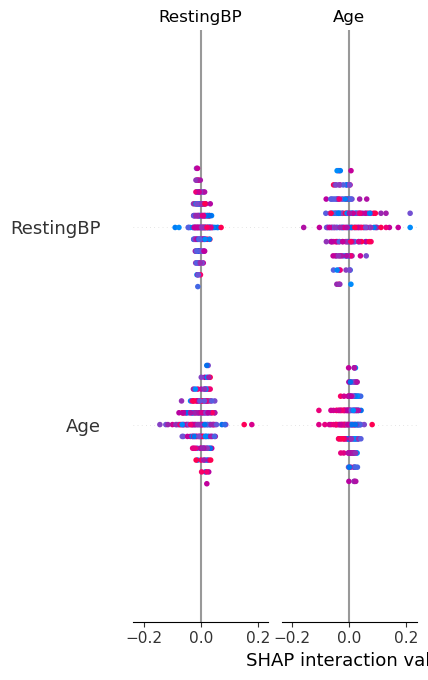


>>> SHAP Interaction Plot (media del impacto absoluto) - Gráfico 2


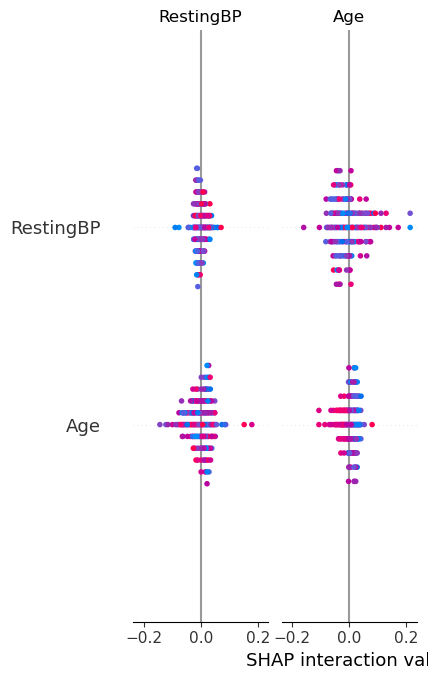


>>> SHAP Waterfall Plot (ejemplo caso representativo - clase positiva=1) - Gráfico 3


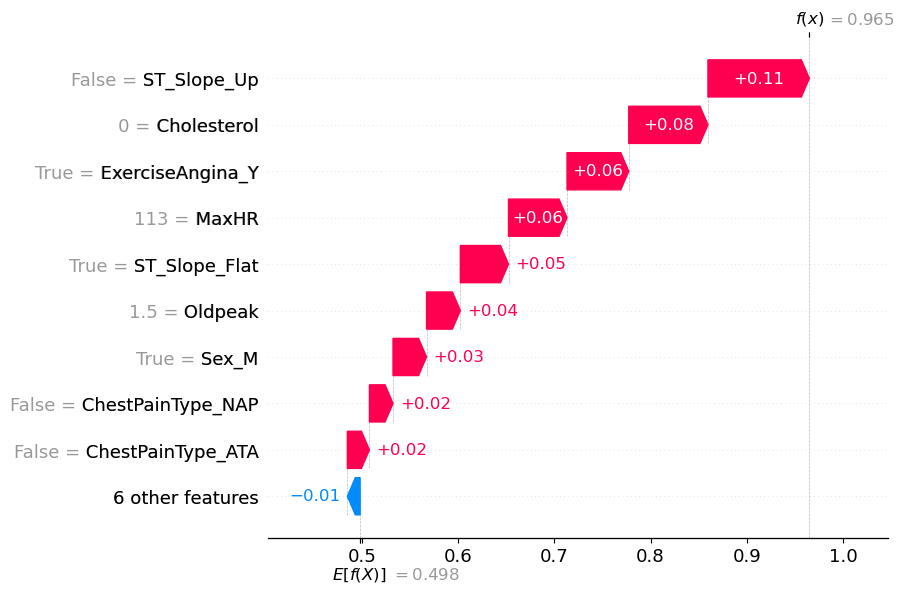

In [211]:
# -*- coding: utf-8 -*-
"""
Explicaciones globales con SHAP: summary, bar y waterfall plot
"""

import pandas as pd
import shap
import joblib
import matplotlib.pyplot as plt

# ---------- 1) Cargar datos y modelo ----------
X_test = pd.read_csv("X_test.csv")
rf_model = joblib.load("random_forest_model.pkl")

# One-hot encoding consistente con entrenamiento
cat_cols = X_test.select_dtypes(include=['object']).columns.tolist()
X_test_enc = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

X_train_enc = pd.read_csv("X_train.csv")
cat_cols_train = X_train_enc.select_dtypes(include=['object']).columns.tolist()
X_train_enc = pd.get_dummies(X_train_enc, columns=cat_cols_train, drop_first=True)
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

# ---------- 2) SHAP explainer ----------
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_test_enc)

# ---------- 3) Gráfico summary plot ----------
print("\n>>> SHAP Summary Plot (global feature impact) - Gráfico 1")
shap.summary_plot(shap_values, X_test_enc, plot_type="dot")
plt.show()

# ---------- 4) Gráfico bar plot ----------
print("\n>>> SHAP Interaction Plot (media del impacto absoluto) - Gráfico 2")
shap.summary_plot(shap_values, X_test_enc, plot_type="bar")
plt.show()

# ---------- 5) Ejemplo waterfall global (1 observación representativa) ----------
print("\n>>> SHAP Waterfall Plot (ejemplo caso representativo - clase positiva=1) - Gráfico 3")
shap.plots.waterfall(shap_values[0, :, 1], max_display=10)
plt.show()


### *Interpretación de los gráficos:*

* Los resultados del **gráfico 1** arrojan que:

1. `RestingBP` (Presión arterial en reposo)

* La mayoría de los puntos están cerca de 0, por lo que, su interacción con otras variables (como Age) no genera un efecto fuerte en las predicciones.

* Algunos puntos rojos (valores altos de presión) aparecen con contribuciones ligeramente positivas, por lo que, sugieren que presión en reposo más alta, en combinación con edad, puede aumentar un poco la probabilidad de enfermedad.

* Los puntos azules (baja presión) tienden a tener efecto cercano a 0 o negativo.

2. `Age` (Edad)

* Similar a `RestingBP`, la mayoría de los efectos están concentrados alrededor de 0 por lo que la interacción de `Age` con otras variables no muestra un patrón fuerte.

* Sin embargo, algunos puntos rojos (edad alta) se ubican en valores SHAP positivos por lo que, edades mayores tienden a interactuar con otras variables aumentando el riesgo.

* Edades bajas (azul) parecen no empujar el riesgo hacia arriba, incluso ligeramente hacia abajo.

3. Magnitud de las interacciones

* Todos los puntos están dentro de ±0.2, por lo que, las interacciones entre `Age` y `RestingBP` no son dominantes en el modelo.

* Esto significa que el modelo considera más importante el efecto individual de cada variable que su interacción conjunta.

En conclusión, edad alta y presión en reposo alta combinadas empujan un poco hacia mayor probabilidad de enfermedad, pero el efecto es pequeño comparado con otras variables del modelo (ej: `ST_Slope`, `ChestPainType`). La interacción entre `Age` y `RestingBP` no es clave, ya que la mayoría de los puntos están muy cerca de 0. El modelo usa más el efecto individual de esas variables que su interacción.


* Los resultados del **gráfico 2** arrojan que:

1. `RestingBP` (Presión en reposo)

* La mayoría de interacciones con otras variables están centradas en torno a 0, por lo que, su efecto interactivo no es fuerte.

* Algunos puntos rojos (valores altos de presión) se mueven hacia la derecha (~0.1–0.15), lo que indica que presión alta puede interactuar con edad aumentando ligeramente la probabilidad de enfermedad.

2. `Age` (Edad)

* También concentra sus interacciones cerca de 0, lo que significa que el impacto combinado con otras variables no es dominante.

* Valores altos de edad (rojo) tienen más dispersión hacia la derecha por lo que, sugieren que edad avanzada interactúa con otros factores (como presión) aumentando el riesgo.

* Valores bajos (azul) tienden a estar muy cerca de 0 → poco impacto combinado.

3. Magnitud

* Ninguna interacción sobrepasa ±0.2 lo que se confirma que estas dos variables (`Age` y `RestingBP`) son relevantes por sí solas, pero sus interacciones entre sí no son determinantes para el modelo.

En conclusión, edad avanzada combinada con presión arterial en reposo alta tiene un efecto ligeramente mayor en aumentar la predicción de riesgo, pero no es un factor crítico dentro del modelo. En general, la interacción entre `Age` y `RestingBP` es débil: el modelo usa más la influencia individual de cada variable que su efecto conjunto. Esto sugiere que para este dataset, la edad y la presión importan, pero no actúan de forma sinérgica fuerte como predictores de enfermedad cardíaca.


* Los resultados del **gráfico 3** arrojan que:

Explicaciones individuales (clase 1 implica riesgo positivo) para el caso (paciente) 0 (ejemplo caso representativo - clase positiva=1)

La predicción base del modelo es `E[f(x)] = 0.498`, es decir, casi el 50% de probabilidad de enfermedad si no supiéramos nada del paciente.

Después de sumar los efectos de las variables, la predicción final del modelo para este paciente es `f(x) = 0.965`, es decir, el modelo predice con mucha confianza que tiene riesgo positivo de enfermedad cardíaca.

Factores que empujan hacia la enfermedad (clase 1, rojo):

* `ST_Slope_Up = False` (+0.11): Este es el factor más influyente. Indica que el segmento ST del ECG del paciente no se elevó durante el ejercicio. La elevación del ST es un signo de un corazón sano, por lo que su ausencia es una fuerte indicación de riesgo para el modelo.

* `Cholesterol = 0` (+0.08): Una vez más, el valor de colesterol de 0.0 aparece como un factor de riesgo significativo. Como hemos comentado, este valor es físicamente imposible, lo que sugiere que podría ser un error de datos que el modelo interpreta como un signo de riesgo extremo.

* `ExerciseAngina_Y = True` (+0.06): El paciente sí experimentó dolor de pecho durante el ejercicio, lo cual es un síntoma clásico de la enfermedad arterial coronaria y una señal de riesgo para el modelo.

* `MaxHR = 113` (+0.06): La frecuencia cardíaca máxima de 113 es relativamente baja para un esfuerzo máximo, especialmente en personas más jóvenes. El modelo interpreta esto como una señal de que el corazón no está funcionando a su capacidad máxima, lo que puede ser un signo de enfermedad.

* `ST_Slope_Flat = True` (+0.05): El aplanamiento del segmento ST durante el ejercicio es otro indicador de un flujo sanguíneo inadecuado al corazón, por lo que este factor también empujó la predicción hacia un resultado positivo.

* `Oldpeak = 1.5` (+0.04): Un valor de 1.5 en Oldpeak indica una depresión significativa del segmento ST durante el ejercicio, lo que sugiere isquemia miocárdica (flujo sanguíneo reducido). Este es un factor de riesgo bien conocido.

* `Sex_M = True` (+0.03): El hecho de que el paciente sea hombre es un factor de riesgo conocido para la enfermedad cardíaca, y el modelo lo tiene en cuenta.

* `ChestPainType_NAP = False` (+0.02): La ausencia del tipo de dolor de pecho "no anginal" sumó un pequeño riesgo.

* `ChestPainType_ATA = False` (+0.02): De manera similar, la ausencia del tipo de dolor de pecho "atípico de angina" también sumó un pequeño riesgo.

En conclusión, el modelo predijo que este paciente tiene una alta probabilidad (96.5%) de tener una enfermedad cardíaca. Esta predicción se basa en una combinación de factores de riesgo clásicos y clínicamente significativos, como la presencia de angina de pecho inducida por el ejercicio, la respuesta anormal del ECG (ST_Slope_Up=False, ST_Slope_Flat=True) y un valor de Oldpeak elevado. El valor anómalo de colesterol también contribuyó significativamente a esta alta probabilidad, lo que podría ser una fuente de error en la predicción.

### 3.3 Explicaciones individuales (mínimo 3 casos distintos) para la clase 0 (Negativa)

Explicaciones individuales utilizando SHAP para los mismo pacientes del apartado `3.1` pera ahora para la `clase 0` (negativa), es decir, de que el mismo paciente no contraiga una enfermedad cardíaca. 


>>> Explicación para caso #0 (y_test=1, clase=0):


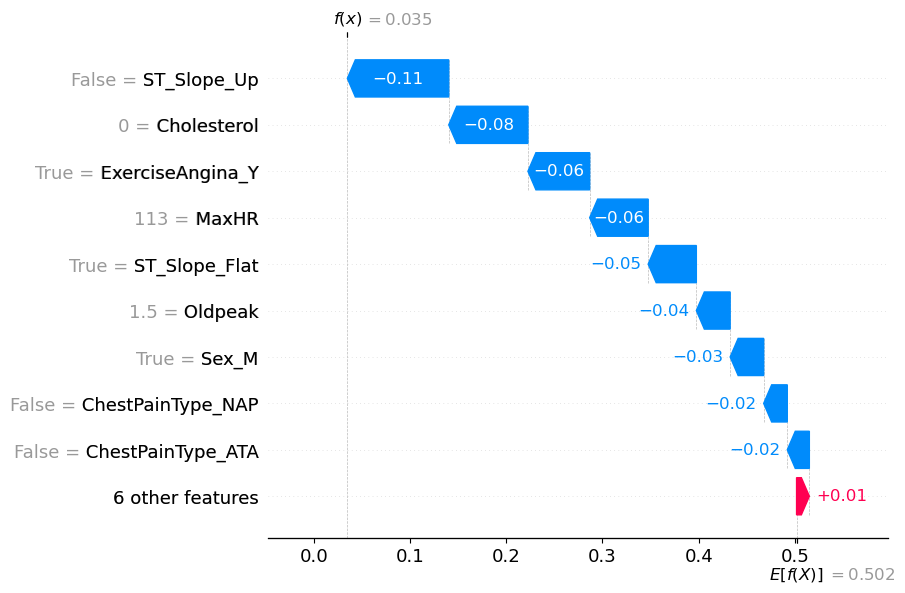


>>> Explicación para caso #10 (y_test=1, clase=0):


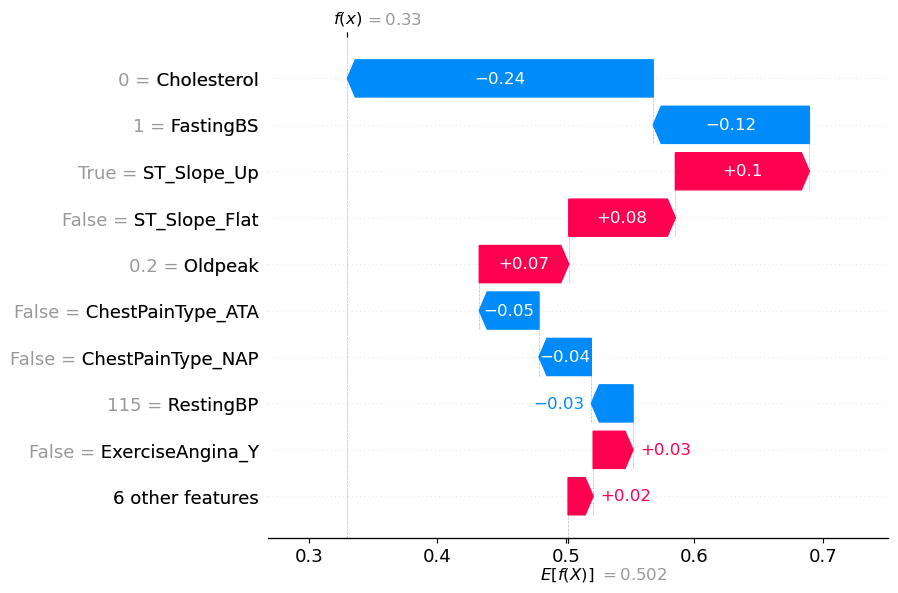


>>> Explicación para caso #50 (y_test=0, clase=0):


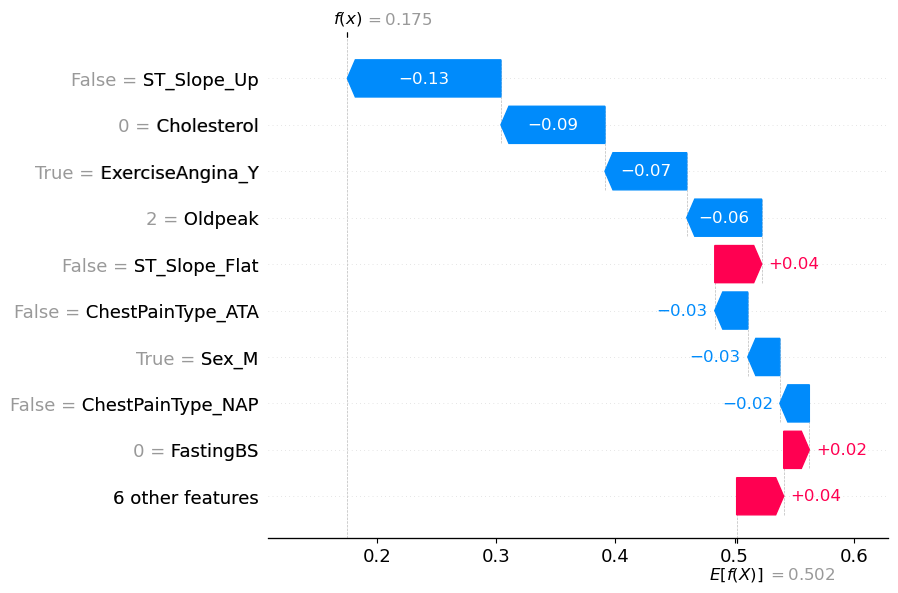

In [198]:
# shap_individual_class0.py
import pandas as pd
import shap
import joblib
import matplotlib.pyplot as plt

# ---------- 1) Cargar datos y modelo ----------
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv").squeeze()
rf_model = joblib.load("random_forest_model.pkl")

# One-hot encoding consistente
cat_cols = X_test.select_dtypes(include=['object']).columns.tolist()
X_test_enc = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

X_train_enc = pd.read_csv("X_train.csv")
cat_cols_train = X_train_enc.select_dtypes(include=['object']).columns.tolist()
X_train_enc = pd.get_dummies(X_train_enc, columns=cat_cols_train, drop_first=True)
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

# ---------- 2) SHAP explainer ----------
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_test_enc)

# ---------- 3) Explicaciones individuales para clase 0 ----------
indices = [0, 10, 50]
for i in indices:
    print(f"\n>>> Explicación para caso #{i} (y_test={y_test.iloc[i]}, clase=0):")
    shap.plots.waterfall(shap_values[i, :, 0], max_display=10)  # clase 0
    plt.show()


### *Interpretación de los gráficos:*

**Explicaciones individuales (clase 0 → riesgo negativo) para el caso (paciente) 0**

La predicción base del modelo es `E[f(x)] = 0.502`, es decir, el 50% de probabilidad de enfermedad si no supiéramos nada del paciente.

Después de sumar los efectos de las variables, la predicción final del modelo para este paciente es `f(x) = 0.035`, es decir, que el modelo está casi seguro de que este paciente no pertenece a la clase 0 sino que a la clase 1, es decir, que presenta una enfermedad cardíaca (ya que paso de 50% a tener solo un 3.5% de probabilidad).

Valor Real (`y_test=1`): La anotación "y_test=1" indica que, en realidad, este paciente sí tiene una enfermedad cardíaca, entonces el modelo predice correctamente, es un verdadero positivo.

**Factores que Empujaron la Predicción a la Baja (Barras Azules)**

Estos factores son los que hicieron frenar al modelo con el objetivo de no clasificarlo a la clase 0, es decir, que no padezca de una enfermedad coronaria:

* `ST_Slope_Up = False` (-0.11): Este es el factor más influyente. Indica que el segmento ST del ECG del paciente no se elevó durante el ejercicio. La elevación del segmento ST es un signo de un corazón sano, por lo que la ausencia de elevación es una señal de riesgo.

* `Cholesterol = 0` (-0.08): El valor de colesterol de 0.0, que antes veíamos empujando el riesgo al alza, aquí lo vemos empujando la predicción a la baja. Aunque esta variable es anómalo, frenó al modelo para que no clasificar al paciente a la categoría de un paciente sano. Recordar que un nivel de colesterol de 0 es fisiológicamente imposible.

* `ExerciseAngina_Y = True` (-0.06): El paciente sí experimentó angina (dolor de pecho) durante el ejercicio. La presencia de angina es un síntoma claro de enfermedad cardíaca lo cual hizo frenar al modelo.

* `MaxHR` (113), `ST_Slope_Flat = True`, `Oldpeak` (1.5), `Sex_M = True`, `ChestPainType_NAP = False` y `ChestPainType_ATA = False` también contribuyeron negativamente pero en menor medida.

En conclusión, el modelo encuentra que las condiciones presentes en el paciente reducen fuertemente la probabilidad de estar sano (clase 0), evaluando como baja esa probabilidad acorde a los valores presentados en los atributos principales.


**Explicaciones individuales (clase 0 → riesgo negativo) para el caso (paciente) 10**

La predicción base esperado del modelo es `E[f(x)] = 0.502`, es decir, el 50% de probabilidad de enfermedad si no supiéramos nada del paciente.

Después de sumar los efectos de las variables, la predicción final del modelo para este paciente es `f(x) = 0.33`, es decir, que el modelo estima que este paciente solo tiene un 33% de probabilidad de NO tener una enfermedad cardíaca, lo cual lo clasifica en la clase "con enfermedad" (ya que pasó de tener 50% a un 33% de probabilidad).

`Valor Real (y_test=1)`: La anotación "y_test=1" indica que, en realidad, este paciente sí tiene una enfermedad cardíaca, entonces el modelo predice correctamente, es un verdadero positivo.



**Factores que frenaron la predicción a la baja (barras azules) clase 0 (No enfermo):**

Estos factores son los principales responsables de la predicción incorrecta. A pesar de que el paciente tiene la enfermedad, el modelo los interpretó como signos de un corazón sano.

`Cholesterol = 0` (-0.24): Este es el factor más influyente. El valor de colesterol de 0.0 es un dato anómalo o un error de registro. El modelo lo interpretó como una señal de un riesgo extremadamente bajo de enfermedad cardíaca, ya que un valor de colesterol de 0 es fisiológicamente imposible. Esto fue el factor principal que hizo que la predicción fuera tan baja. Recordar que un nivel de colesterol de 0 es fisiológicamente imposible.

`FastingBS = 1` (-0.12): El paciente tiene un nivel alto de azúcar en sangre en ayunas (el valor 1 indica que es alto), lo cual es un factor de riesgo para enfermedades cardíacas, lo que frenó al modelo.

`ChestPainType_ATA = False` (-0.05) & `ChestPainType_NAP = False` (-0.04): La ausencia de dolor de pecho atípico (ATA) y no anginal (NAP) son factores que, para el modelo, empujaron la predicción hacia un mayor riesgo de enfermedad. 

`RestingBP = 115` (-0.03): El valor de presión arterial de 115 mmHg, que es normal, ayudó a disminuir la probabilidad de enfermedad.

**Factores que empujaron la predicción hacia la (barras rojas) clase 0 (No Enfermo):**

Estos factores aumenta la probabilidad para la clase 0 .

* `ST_Slope_Up = True` (+0.1).

* `ST_Slope_Flat = False` (+0.08).

* `Oldpeak = 0.2` (+0.07).

* `ExerciseAngina_Y = False` (+0.03).

En conclusión, el modelo interpreta que, dado este conjunto de características, es más probable que el caso NO pertenezca a la clase 0 ("No enfermo"), ya que la predicción es solamente 33% para clase 0.


**Explicaciones individuales (clase 0 → riesgo negativo) para el caso (paciente) 50**

La predicción base esperado del modelo es `E[f(x)] = 0.502`, es decir, el 50% de probabilidad de enfermedad si no supiéramos nada del paciente.

Después de sumar los efectos de las variables, la predicción final del modelo para este paciente es `f(x) = 0.175`, es decir, el modelo estima que hay un 17.5% de probabilidad de que el paciente NO tenga una enfermedad cardíaca. El modelo lo clasifica en la clase 1 (con enfermedad).

`Valor real (y_test=0)`: La anotación "y_test=0" indica que, en realidad, este paciente no tiene una enfermedad cardíaca. En este caso, el modelo hizo una predicción errónea (un falso positivo).

**Factores que frenaron la predicción a la baja (barras azules) clase 0 (No enfermo):**

Las barras azules son los factores que más contribuyeron para frenar en la predicción de "no enfermedad".

* `ST_Slope_Up = False` (-0.13): La ausencia de elevación del segmento ST durante el ejercicio es un factor de riesgo. Lo cual frenó al modelo para clasificarlo correctamente a clase 0.

* `Cholesterol = 0` (-0.09): El valor de colesterol de 0.0, que hemos visto en otros gráficos, se interpreta aquí como un factor que disminuye el riesgo, empujando fuertemente la predicción hacia abajo. Esto probablemente se debe a que el modelo lo interpreta como un valor extremadamente bajo, aunque sea un error de datos.

* `ExerciseAngina_Y = True` (-0.07): El paciente sí experimentó angina (dolor de pecho) durante el ejercicio. Este es un síntoma clásico de la enfermedad cardíaca, lo cual frenó al modelo.

* `Oldpeak = 2` (-0.06): Un valor de 2 en `Oldpeak` indica una depresión significativa del segmento ST y es un factor de riesgo. Lo cual frenó al modelo.

* `ChestPainType_ATA = False` (-0.03) & `Sex_M = True` (-0.03): Que el paciente no tenga el tipo de dolor de pecho "ATA" y sea hombre son factores que, para el modelo, también reducen el riesgo. Esto es contrario a la lógica clínica, lo que sugiere que el modelo no está aprendiendo bien de estas variables.

* `ChestPainType_NAP = False` (-0.02): De manera similar, la ausencia del tipo de dolor de pecho "no anginal" sumó un pequeño factor de protección.

**Factores que Aumentaron la probabilidad (Barras Rojas):**


* `ST_Slope_Flat = False` (+0.04).
  
* `FastingBS = 0` (+0.02).

* `6 other features` (+0.04 acumulado).

En conclusión, El modelo cree que este caso tiene baja probabilidad de ser clase 0 (sano) debido a la suma mayor de contribuciones negativas (azules) que bajan la predicción a 0.175. Sin embargo, como `y_test=0` indica que el paciente realmente no presenta enfermedad coronaria. Entonces la probabilidad predicha para `clase 0` (ausencia de enfermedad) puede ser diferente y estar equivocada, como en el gráfico que mostró una probabilidad de 0.175 para `clase 0`, que es baja y sugiere `clase 1` según el modelo. Esto muestra un posible error del modelo o un área donde el modelo podría necesitar mejorar, pues su predicción no coincide con la etiqueta verdadera del paciente


### 3.2 Gráficos globales (summary, bar, waterfall) para la clase 0 (Negativa)

Con el siguiente código se pretende obtener una visión global y local del impacto de las variables en las predicciones del modelo de riesgo cardíaco para la `clase 0`, es decir, con los mismos paciente pero de no contraer una enfermedad relacionada con el corazón, usando SHAP como herramienta de interpretabilidad. Y, visualizar resultados con tres tipos de gráficos SHAP (dot plot, bar plot, waterfall).


>>> SHAP Summary Plot (clase 0) - Gráfico 1


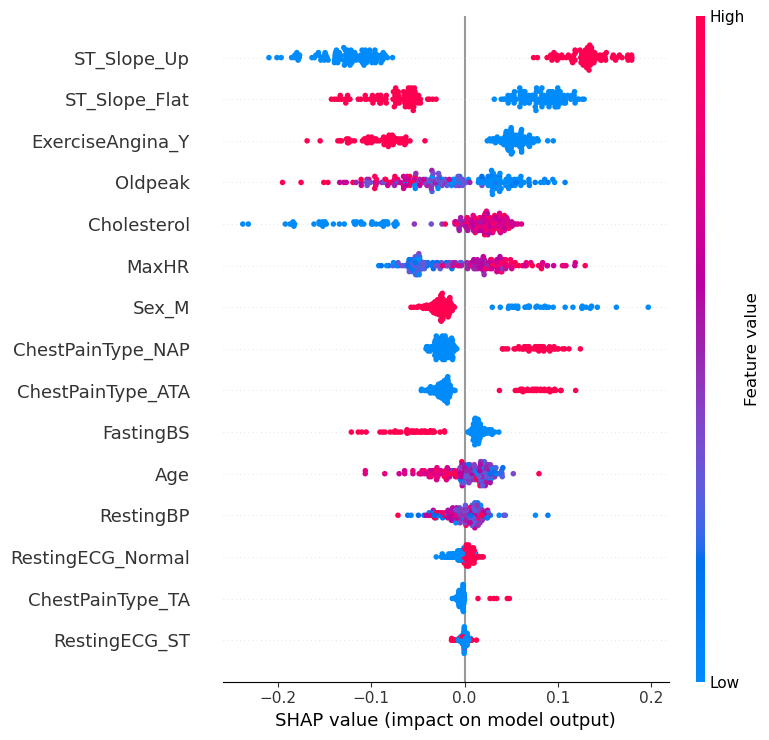


>>> SHAP Bar Plot (clase 0) - Gráfico 2


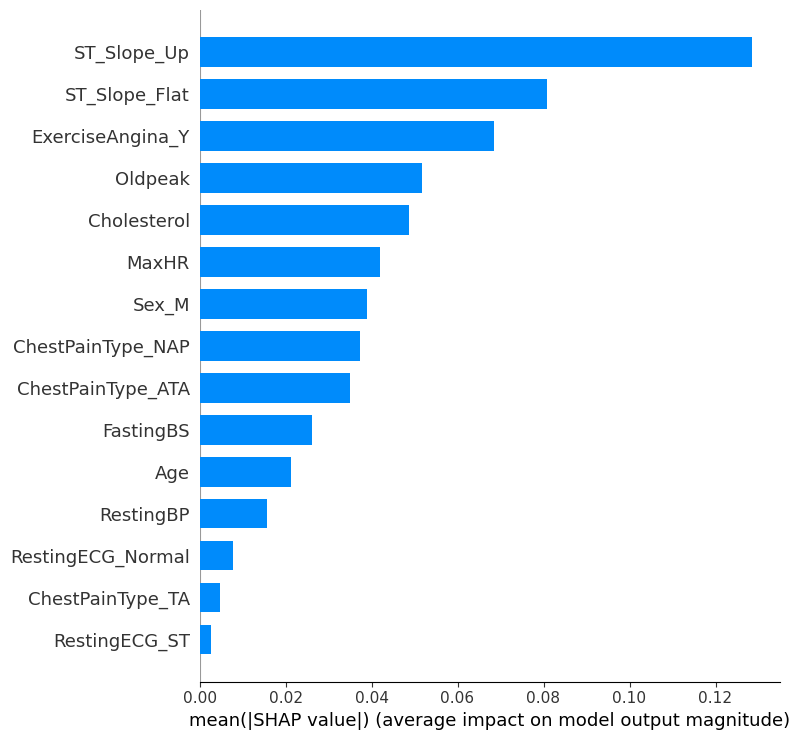

In [219]:
# shap_global_class0.py
import pandas as pd
import shap
import joblib
import matplotlib.pyplot as plt

# ---------- 1) Cargar datos y modelo ----------
X_test = pd.read_csv("X_test.csv")
rf_model = joblib.load("random_forest_model.pkl")

# One-hot encoding consistente
cat_cols = X_test.select_dtypes(include=['object']).columns.tolist()
X_test_enc = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

X_train_enc = pd.read_csv("X_train.csv")
cat_cols_train = X_train_enc.select_dtypes(include=['object']).columns.tolist()
X_train_enc = pd.get_dummies(X_train_enc, columns=cat_cols_train, drop_first=True)
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

# ---------- 2) SHAP explainer ----------
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_test_enc)

# ---------- 3) Summary plot (clase 0) ----------
print("\n>>> SHAP Summary Plot (clase 0) - Gráfico 1")
shap.summary_plot(shap_values[:, :, 0], X_test_enc, plot_type="dot")
plt.show()

# ---------- 4) Bar plot (clase 0) ----------
print("\n>>> SHAP Bar Plot (clase 0) - Gráfico 2")
shap.summary_plot(shap_values[:, :, 0], X_test_enc, plot_type="bar")
plt.show()


### *Interpretación de los gráficos:*

En base a los resultados de los gráficos se puede extraer la siguiente información:

#### 1. SHAP summary Plot - Gráfico 1

En este gráfico resume el impacto de las variables en todo el conjunto de datos. En donde: 

* `Eje Y` (Variable): Muestra todas las variables del modelo, ordenadas de la más influyente (arriba) a la menos influyente (abajo) para la clase 0, es decir, NO tenga una enferemedad cardíaca.

* `Eje X` (Valor SHAP): Representa el impacto de la variable en la predicción del modelo. Los valores a la derecha del 0 empujan la predicción hacia la clase 0 (sin enfermedad), y los valores a la izquierda la empujan hacia la clase positiva (con enfermedad cardíaca).

* Color de los puntos:

  * Rojo: Significa que el valor de la variable es alto.
 
  * Azul: Significa que el valor de la variable es bajo.
 
  * La degradación de colores entre el azul y el rojo indica valores intermedios.

* Distribución de los puntos: La dispersión horizontal de los puntos muestra el rango de impacto de una variable. Cada punto representa la contribución de esa variable para un paciente en particular.

Ahora, como ya hemos indicado el modo de lectura del gráfico y, analizándolo, podemos identificar las variables más importantes para el modelo y cómo se relacionan con el diagnóstico de **No contraer enfermedad cardíaca**:
 
1. `ST_Slope_Up`:

* Rojo (1, pendiente “Up”): puntos a la derecha (SHAP > 0).

  * La presencia de pendiente ascendente aumenta la probabilidad de no enfermedad.

* Azul (0, pendiente no Up): valores hacia la izquierda (SHAP < 0).
  
  * La ausencia de pendiente “Up” favorece la enfermedad.

En conclusión, tener un segmento ST en subida es una señal protectora.

2. `ST_Slope_Flat`: Indica que la pendiente del segmento ST durante el ejercicio es plana.

* Rojo (1, presencia de ST_Slope_Flat): aparece principalmente hacia la izquierda (SHAP negativo para clase 0), es decir: cuando la pendiente es Flat, reduce la probabilidad de pertenecer a la clase 0 — en términos prácticos, aumenta la probabilidad de enfermedad (clase 1).

En conclusión, clínica y lógicamente tiene sentido: una pendiente ST plana suele asociarse a peor respuesta al ejercicio / isquemia y por tanto es un factor de riesgo frente a una pendiente “Up”.

3. `ExerciseAngina_Y`: Los puntos rojos (presencia de angina) se agrupan en el lado izquierdo, lo cual aumenta el riesgo de enfermedad. Los puntos azules (ausencia de angina) se agrupan a la derecha, reduciendo el riesgo.

4. `Oldpeak`: Los puntos rojos (valores altos de Oldpeak) se agrupan a la izquierda, indicando que una mayor depresión del ST empuja la predicción hacia la enfermedad. Los puntos azules (valores bajos de Oldpeak) se agrupan a la derecha, reduciendo el riesgo (clase 0).

5. `Cholesterol`: Los puntos azules (valores bajos de colesterol) se agrupan en el lado izquierdo, aumentando el riesgo. Esta es la misma anomalía que vimos en los gráficos de cascada, donde un valor de 0 (bajo) es malinterpretado como un factor de riesgo.

6. `MaxHR`: Los puntos rojos (MaxHR alto) se agrupan a la derecha, reduciendo el riesgo. Los puntos azules (MaxHR bajo) se agrupan a la izquierda, lo que aumenta la probabilidad de enfermedad.

En conclusión, el análisis del gráfico de resumen SHAP revela que el modelo, en su mayoría, está utilizando los factores de riesgo de manera clínicamente coherente y lógica. Esto significa que las variables que los médicos asocian tradicionalmente con la enfermedad cardíaca, como la presencia de angina (ExerciseAngina_Y), un segmento ST plano o deprimido (ST_Slope_Flat y Oldpeak), y una frecuencia cardíaca máxima baja (MaxHR), son correctamente identificadas por el modelo como factores que aumentan la probabilidad de enfermedad. Del mismo modo, las variables que indican una buena salud cardiovascular, como la ausencia de angina o un segmento ST ascendente, se interpretan como factores que disminuyen el riesgo. Sin embargo, el análisis también se ha identificado una falla crítica y significativa: el manejo de la variable Colesterol. El modelo está aprendiendo una relación incorrecta, donde los valores de colesterol bajos se asocian a un mayor riesgo y los valores altos a un menor riesgo. Esto contradice directamente el conocimiento médico y es un indicador claro de que los datos de entrenamiento para esta variable contienen errores o anomalías, como los valores de 0 que hemos observado.

#### 2. SHAP Bar Plot (clase 0) - Gráfico 2

Este gráfico resume la importancia global de cada variable para el modelo, promediando el impacto absoluto (magnitud) en la predicción de la `clase 0`, que corresponde a la ausencia de enfermedad cardíaca. En donde:

* `Eje Y`: Muestra las variables del modelo ordenadas de la más influyente (arriba) a la menos influyente (abajo).

* `Eje X`: Representa el valor SHAP promedio, o la magnitud promedio del impacto de cada variable en la predicción del modelo. Cuanto más larga sea la barra, más importante es la variable para la predicción de la `clase 0`.

Dicho lo anterior, el gráfico muestra que el modelo se basa principalmente en algunas variables para predecir si un paciente no tendrá una enfermedad cardíaca: *(Se interpretará las 6 primeras más importantes)*

1. `ST_Slope_Up`: Es la variable más importante. Su gran impacto sugiere que una pendiente del segmento ST ascendente es el factor más significativo para que el modelo prediga que el paciente no tiene una enfermedad cardíaca. Esto es clínicamente coherente, ya que esta es una señal de un corazón sano.

2. `ST_Slope_Flat`: Esta variable también tiene un gran impacto. La ausencia de una pendiente plana (que es un factor de riesgo) es muy importante para predecir que el paciente no está enfermo.

3. `ExerciseAngina_Y`: La presencia o ausencia de angina durante el ejercicio es el tercer factor más importante. Su impacto indica que la ausencia de angina es una señal muy fuerte para que el modelo prediga la `clase 0`.

4. `Oldpeak`: Este es el cuarto factor más importante. Un valor bajo de Oldpeak (que indica menor depresión del ST) es una señal clave para que el modelo prediga un resultado negativo.

5. `Cholesterol`: El colesterol también tiene una importancia significativa, aunque menor que los factores de ECG. Esto confirma que el modelo le da mucho peso a esta variable, a pesar de los errores en los datos que hemos observado en los análisis de casos individuales.

6. `MaxHR`: Una frecuencia cardíaca máxima alta (valores altos de MaxHR) es una señal de un corazón sano, y el modelo utiliza esta variable para predecir la `clase 0`.

En conclusión, este SHAP Bar Plot nos da una visión general de las prioridades del modelo. Los factores relacionados con el ECG durante el ejercicio (`ST_Slope_Up`, `ST_Slope_Flat`, `Oldpeak`) son, con mucho, los más importantes para predecir la ausencia de enfermedad cardíaca. Esto tiene sentido desde un punto de vista clínico, ya que estas mediciones están directamente relacionadas con la salud del corazón bajo estrés. El modelo también considera importantes la presencia de angina y el nivel de colesterol, lo que confirma su relevancia para la predicción global.


### 3.3 Influencia de las variables en las predicciones

El modelo Random Forest ha aprendido a identificar los factores de riesgo y protección más relevantes para la predicción de enfermedades cardíacas, y la influencia de cada variable es la siguiente:

* Variables de ECG (ST_Slope_Up, ST_Slope_Flat, Oldpeak): Estas son, con mucho, las variables más influyentes y clínicamente consistentes. Los patrones de ECG durante el ejercicio son los indicadores más fuertes de la salud del corazón. El modelo correctamente asocia una pendiente ascendente (ST_Slope_Up) con la ausencia de enfermedad, mientras que una pendiente plana (ST_Slope_Flat) o una depresión significativa (Oldpeak) son señales de alto riesgo.

* Angina por Ejercicio (ExerciseAngina_Y): La presencia de angina es una de las variables más importantes después de las del ECG. El modelo la utiliza de forma consistente como un factor de alto riesgo, lo que es coherente con la clínica, ya que el dolor de pecho inducido por el ejercicio es un síntoma clásico de la enfermedad arterial coronaria.

* Frecuencia Cardíaca Máxima (MaxHR): Esta variable también tiene un impacto significativo. El modelo correctamente asocia una frecuencia cardíaca máxima baja con un mayor riesgo de enfermedad y una frecuencia cardíaca máxima alta con una menor probabilidad de enfermedad.

* Colesterol (Cholesterol): Esta variable tiene una importancia notable, pero su patrón es anómalo. Los análisis de SHAP revelaron que el modelo interpreta los valores de colesterol bajos (cercanos a 0) como un factor de alto riesgo y los valores altos como un factor de protección. Esta contradicción con el conocimiento médico sugiere un problema grave en los datos, probablemente valores de 0 que representan datos faltantes o errores de registro que el modelo no pudo manejar adecuadamente.

* Sexo (Sex_M) y Edad (Age): Ambas son variables sensibles y tienen una influencia menor en la predicción. El modelo tiende a considerar el sexo masculino como un factor de riesgo. La edad, aunque clínicamente muy relevante, no es la variable más influyente para el modelo, lo que podría deberse a la complejidad de su relación con otras variables.

* Glucemia en Ayunas (FastingBS): El nivel de glucosa en ayunas es un factor de riesgo, y el modelo lo utiliza de forma correcta. Un nivel alto aumenta el riesgo de enfermedad.

### 3.4 Patrones emergentes y consistencias

1. **Fiabilidad del modelo basada en ECG**: La fuerte dependencia del modelo en las variables de ECG y angina sugiere que es muy bueno para identificar a los pacientes con anomalías claras en sus pruebas de esfuerzo. El modelo acierta en los casos donde la evidencia clínica es más contundente.

2. **Sensibilidad a los datos anómalos**: El modelo es muy sensible a los errores en los datos. La interpretación errónea del colesterol de 0.0 es un claro ejemplo de esto. A pesar de que las métricas globales son buenas, la explicabilidad revela que el modelo es frágil ante los valores atípicos y puede tomar decisiones incorrectas. Esto se confirma con los casos de falso positivo que analizamos, donde el modelo predijo erróneamente debido a factores que interpretó de forma ilógica.

3. **Importancia de la interpretabilidad**: El proyecto demuestra que la precisión de un modelo no es suficiente. Sin las herramientas de explicabilidad como SHAP y LIME, el equipo de ciencia de datos no habría podido detectar el problema con la variable Cholesterol ni entender por qué el modelo falló en casos específicos. Esto subraya la importancia de construir modelos no solo precisos, sino también transparentes y responsables para poder confiar en ellos en un entorno crítico como el de la salud.

## 4. Aplicación de LIME

El siguiente cuadro de código nos permite aplicar LIME al modelo entrenado con el objetivo de explicar de forma local (caso por caso) las predicciones del modelo de `Random Forest` entrenado sobre el dataset de enfermedad cardíaca, y contrastar esas explicaciones con las obtenidas con SHAP.

In [202]:
# 4A_lime_individual.py
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# ---------- 1) Cargar datos y modelo ----------
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv").squeeze()
y_test = pd.read_csv("y_test.csv").squeeze()
rf_model = joblib.load("random_forest_model.pkl")

# One-hot encoding consistente con entrenamiento
cat_cols_train = X_train.select_dtypes(include=['object']).columns.tolist()
X_train_enc = pd.get_dummies(X_train, columns=cat_cols_train, drop_first=True)
X_test_enc  = pd.get_dummies(X_test, columns=cat_cols_train, drop_first=True)
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

# ---------- 2) Crear LIME explainer ----------
explainer = LimeTabularExplainer(
    training_data=X_train_enc.values,
    feature_names=X_train_enc.columns,
    class_names=[0, 1],
    mode='classification'
)

# ---------- 3) Explicaciones locales (mismos casos SHAP: 0, 10, 50) ----------
indices = [0, 10, 50]
for i in indices:
    print(f"\n>>> Explicación LIME para caso #{i} (y_test={y_test.iloc[i]}):")
    exp = explainer.explain_instance(
        X_test_enc.iloc[i].values, 
        rf_model.predict_proba, 
        num_features=10
    )
    exp.show_in_notebook(show_table=True)



>>> Explicación LIME para caso #0 (y_test=1):


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



>>> Explicación LIME para caso #10 (y_test=1):


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



>>> Explicación LIME para caso #50 (y_test=0):


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### *Interpretación de los resultados:*

En base a los resultados LIME obtenidos se tiene las siguientes observaciones:

* **Explicación LIME para el paciente (caso) #0 con presencia de una enfermedad cardíaca (y_test=1)**:

 * Predicción del modelo: El cuadro en la parte superior izquierda muestra las probabilidades de predicción. El modelo predijo que hay una probabilidad del 4% de que el paciente no tenga enfermedad cardíaca (clase 0) y una probabilidad del 96% de que sí la tenga (clase 1).

 * Valor real (`y_test=1`): La anotación "y_test=1" indica que, en realidad, el paciente sí tiene una enfermedad cardíaca. En este caso, el modelo hizo una predicción correcta (un verdadero positivo).

 * Contribuciones de las variables: La columna central muestra las variables que más influyeron en la predicción.

   * Barras naranjas: Indican factores que aumentaron la probabilidad de enfermedad cardíaca.
  
   * Barras azules: Indican factores que disminuyeron la probabilidad de enfermedad cardíaca.
  
En cuanto al análisis de factores se tiene los siguientes resultados:

1. `ST_Slope_Up = 0.00`: Este es el factor más influyente. Indica que el valor del paciente para `ST_Slope_Up` es igual a 0 (ausencia de elevación). Esto es un signo de riesgo y aumentó significativamente la probabilidad de enfermedad (+0.23).

2. `ST_Slope_Flat = 1.00`: El paciente tiene un valor de `ST_Slope_Flat` mayor a 0 (presencia de aplanamiento). El aplanamiento del segmento ST durante el ejercicio es un signo de isquemia y, por lo tanto, aumentó la probabilidad de enfermedad (+0.13).

3. `ExerciseAngina = 1.00`: El paciente tiene un valor de `ExerciseAngina` mayor a 0 (presencia de dolor de pecho con el ejercicio), lo cual es un síntoma clásico de enfermedad cardíaca y contribuyó a la alta predicción de riesgo (+0.11).

4. `Cholesterol = 0.00`: El paciente tiene un nivel de colesterol por debajo de 180. El modelo lo interpreta como un factor que aumenta el riesgo. Como hemos visto en los análisis de SHAP, el modelo tiene una lógica extraña con la variable Colesterol (+0.09).

5. `MaxHR = 113.00`: Una frecuencia cardíaca máxima de 113 es baja, lo que indica un posible problema cardíaco y empuja la predicción hacia la enfermedad (+0.07).

6. `FastingBS = 0.00`: Un nivel normal de azúcar en sangre en ayunas es un factor protector, y el gráfico muestra que disminuyó ligeramente la probabilidad de enfermedad cardíaca (la barra es azul) (-0.07).


En conclusión, el análisis de LIME confirma que la predicción del modelo para este paciente se basa en factores clínicamente relevantes y de riesgo. Los principales indicadores de una enfermedad cardíaca —como la respuesta anormal del ECG durante el ejercicio (`ST_Slope_Up`, `ST_Slope_Flat`), la presencia de angina y una baja frecuencia cardíaca máxima— empujaron la predicción final a un resultado correcto.

Aunque el modelo acertó en la predicción, el análisis también resalta el manejo inusual del Colesterol, lo que podría ser una fuente de error en otros casos. A diferencia de SHAP, que muestra el impacto de cada valor de característica, LIME muestra las reglas del modelo local (por ejemplo, `ST_Slope_Up <= 0.00`) que condujeron a la decisión.

* **Explicación LIME para el paciente (caso) #10 con presencia de una enfermedad cardíaca (y_test=1)**:

El gráfico muestra cómo el modelo llegó a su decisión para este paciente específico. En la parte superior izquierda, el modelo predice una probabilidad del 33% para la clase 0 (no enfermedad) y una probabilidad del 67% para la clase 1 (enfermedad). Por lo tanto, el modelo clasifica a este paciente como alguien con una enfermedad cardíaca.

La anotación `y_test=1` confirma que el paciente realmente tiene una enfermedad cardíaca. En este caso, el modelo hizo una predicción correcta (verdadero positivo).

En cuanto al análisis de factores se tiene los siguientes resultados:

* `ST_Slope_Up = 1.00`: El paciente tiene un valor de `ST_Slope_Up` igual 1 (presencia de elevación). Esto es un factor de frenado para el modelo y lo interpreta como una señal de no enfermedad se inclina para la `clase 0` (-0.24).

* `ST_Slope_Flat = 0.00`: El paciente tiene un valor de `ST_Slope_Flat` igual a 0 (ausencia de aplanamiento). El aplanamiento del segmento ST durante el ejercicio es un signo de isquemia, por lo que su ausencia se interpreta como un factor protector. Por ello, esta variable empujó la predicción hacia la clase 0 (no enfermedad) (-0.13).

* `ExerciseAngina_Y = 0.00`: El paciente no experimentó angina (dolor de pecho) con el ejercicio, un factor que disminuyó la probabilidad de enfermedad (-0.12).

* `FastingBS = 1.00`: El paciente tiene un nivel de azúcar en la sangre en ayunas alto, un factor de riesgo que empujó la predicción hacia un resultado positivo (+0.06).

* `Cholesterol <= 0.00`: El paciente tiene un nivel de colesterol por debajo de 180. El modelo lo interpreta como un factor de riesgo, lo que es una anomalía que hemos visto en análisis anteriores (+0.09).

En conclusión, el análisis LIME para este paciente muestra que el modelo tomó una decisión correcta, clasificándolo como alguien con una enfermedad cardíaca. Los principales factores que impulsaron esta predicción fueron la ausencia de una respuesta positiva del ECG durante el ejercicio y la presencia de niveles altos de azúcar en la sangre. Aunque el modelo acertó en este caso, el análisis de LIME, al igual que los gráficos de SHAP, resalta que el modelo interpreta de manera extraña la variable del colesterol, lo que podría llevar a predicciones erróneas en otros casos.

* **Explicación LIME para el paciente (caso) #50 con presencia de una enfermedad cardíaca (y_test=1)**:

El gráfico muestra cómo el modelo llegó a su decisión para este paciente específico. La tabla en la parte superior izquierda muestra las probabilidades de predicción. El modelo predijo una probabilidad del 17% para la clase 0 (no enfermedad) y una probabilidad del 82% para la clase 1 (enfermedad). El modelo clasifica a este paciente como alguien con una enfermedad cardíaca.

La anotación `y_test=0` indica que, en realidad, el paciente no tiene una enfermedad cardíaca. En este caso, el modelo hizo una predicción incorrecta (un falso positivo).

En cuanto al análisis de factores se tiene los siguientes resultados:

`ST_Slope_Up = 0.00`: El paciente tiene un valor de `ST_Slope_Up` igual a 0 (ausencia de elevación). Esto es un factor de riesgo y es la razón principal por la que el modelo predijo la enfermedad (+0.24).

`ST_Slope_Flat = 0.00`: El paciente tiene un valor de `ST_Slope_Flat` igual a 0. Esto se interpreta como la ausencia de aplanamiento, lo que disminuyó la probabilidad de enfermedad para el modelo (-0.13).

`ExerciseAngina_Y = 1.00`: La presencia de dolor de pecho con el ejercicio (`ExerciseAngina_Y = 1`) es un factor de riesgo, por lo que el modelo lo interpreta como una señal de enfermedad (+0.11).

`Cholesterol = 0.00`: El paciente tiene un nivel de colesterol por debajo de 180. El modelo lo interpreta como un factor que aumenta el riesgo, una anomalía que hemos visto consistentemente (+0.09).

`Oldpeak = 2.00`: El paciente tiene un valor de Oldpeak mayor a 1.5. Esto indica una depresión significativa del segmento ST y es un factor de riesgo, por lo que el modelo lo interpreta como una señal de enfermedad (+0.09).

`FastingBS = 0.00`: El paciente tiene un nivel de azúcar en la sangre en ayunas normal, lo que disminuyó la probabilidad de enfermedad (-0.06).

En conclusión, el análisis LIME para este paciente muestra que el modelo tomó una decisión incorrecta, clasificándolo como enfermo cuando no lo está. La razón principal del fallo son los fuertes factores de riesgo que el paciente presenta, como una respuesta anormal en el ECG durante el ejercicio, la presencia de angina y un valor anómalo de colesterol que el modelo malinterpreta como un factor de riesgo. Aunque el modelo hizo una predicción errónea en este caso, el análisis de LIME nos ayuda a entender por qué se equivocó, lo que es vital para mejorar el modelo en el futuro.

### 4.1 Comparativa entre LIME Y SHAP en base a los resultados obtenidos

En base a los resultados que hemos analizado, tanto LIME como SHAP ofrecen una excelente perspectiva sobre la interpretabilidad del modelo, pero lo hacen de forma diferente. Ambos tienen similitudes y diferencias clave.

* **Similitudes**

  * Explicación Local: Ambos métodos se centran en la explicación local, es decir, explican por qué el modelo hizo una predicción específica para un caso individual. Vimos esto claramente en los gráficos de cascada de SHAP y en los gráficos de LIME para los casos #0, #10 y #50.

  * Identificación de la importancia de las variables: Ambas herramientas permiten identificar qué variables son las más importantes para una predicción específica. En ambos casos, las variables de ECG (ST_Slope, Oldpeak) y la presencia de angina fueron consistentemente identificadas como los factores de mayor influencia en las predicciones.

  * Visualización clara: Ambos métodos utilizan visualizaciones intuitivas (barras rojas y azules) para mostrar cómo cada factor empuja la predicción en una dirección (a favor o en contra de la enfermedad). Esto facilita la comunicación de los resultados a personas no técnicas, como médicos y auditores.

* **Diferencias**

  * *Alcance y Perspectiva*:

    * SHAP es un método global y local. Los gráficos de SHAP Summary Plot y SHAP Bar Plot resumen la importancia de las variables en todo el conjunto de datos, lo que permite identificar patrones generales del modelo (como la inconsistencia con el colesterol). Los gráficos de cascada de SHAP explican casos individuales.

    * LIME es estrictamente local. Su propósito es explicar una predicción individual. No tiene una función nativa para resumir el comportamiento global del modelo de la manera que lo hace SHAP.
   
* **Modelo de Explicación**:

  * SHAP se basa en la teoría de juegos (valores de Shapley) para asignar a cada variable un valor de contribución justo que refleja su impacto en la predicción final, considerando todas las posibles combinaciones de variables. Esto lo hace teóricamente más sólido y consistente.

  * LIME crea un modelo local, interpretable y simple (como una regresión lineal) alrededor de la instancia que se está explicando. Este modelo local aproxima el comportamiento del modelo complejo en esa área específica. Aunque es efectivo, su consistencia y precisión dependen de la proximidad y del número de datos que se usan para el modelo local.
 
* **Manejo de Contradicciones**:

  * En los gráficos de cascada de SHAP, vimos que el modelo a veces tenía una lógica contradictoria para variables como Cholesterol y FastingBS en diferentes casos.

  * En los gráficos de LIME, las reglas de explicación (por ejemplo, ST_Slope_Up <= 0.00) también pueden ser inconsistentes de un caso a otro, ya que el modelo local de LIME se construye de forma independiente para cada predicción.

Como conclusión a esto, SHAP parece ser una herramienta más completa y robusta porque no solo explica casos individuales, sino que también ofrece una perspectiva global del comportamiento del modelo. LIME es una excelente herramienta para una explicación rápida y local, pero carece de la capacidad de SHAP para identificar patrones y fallos a gran escala en el modelo. Ambos son complementarios: se puede usar LIME para una explicación rápida de una predicción específica, y SHAP para una auditoría más profunda y un entendimiento holístico del modelo.

## 5. Análisis de sesgo y ética

En este apartado se realiza un análisis de sesgo en el modelo con el objetivo de evaluar si las variables sensibles (en este ejemplo, sexo y edad) tienen un peso desproporcionado en las predicciones del modelo de `Random Forest`, usando los valores de SHAP como referencia. Cuanto más alto el valor, más peso tiene esa variable en el modelo.

### 5.1 Análisis de variables sensibles - Clase 1 (Positiva)

Con el siguiente código queremos saber si es posible:

1. Medir la importancia de variables sensibles (edad, sexo) en el modelo, usando SHAP.

2. Detectar posibles sesgos: si “Age” o “Sex” tienen valores muy altos de importancia, el modelo podría estar discriminando.

3. Servir como punto de partida para discutir ética y mitigación de sesgo (p. ej. regularización, fairness constraints, eliminar variable, etc.).

Todo esto para pacientes con la `clase 1`, es decir, que contraiga una enfermedad cardíaca.

In [286]:
import pandas as pd
import joblib
import shap

# ---------- 1) Cargar datos y modelo ----------
X_test = pd.read_csv("X_test.csv")
rf_model = joblib.load("random_forest_model.pkl")

# One-hot encoding consistente
cat_cols = X_test.select_dtypes(include=['object']).columns.tolist()
X_test_enc = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

X_train_enc = pd.read_csv("X_train.csv")
cat_cols_train = X_train_enc.select_dtypes(include=['object']).columns.tolist()
X_train_enc = pd.get_dummies(X_train_enc, columns=cat_cols_train, drop_first=True)
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

# ---------- 2) SHAP explainer ----------
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_test_enc)

# ---------- 3) Variable sensible a evaluar ----------
sensitive_vars = ['Sex_M', 'Age']  # ejemplo de variables sensibles

print("\n>>> Peso medio absoluto de variables sensibles (SHAP)")

for var in sensitive_vars:
    if var in X_test_enc.columns:
        # Extraemos el vector de contribuciones de la clase positiva
        sv = shap_values[:, var].values[:, 1]  # [:, 1] → clase 1
        mean_abs = abs(sv).mean()
        print(f"{var}: {mean_abs:.4f}")
    else:
        print(f"{var} no se encuentra en las columnas codificadas.")



>>> Peso medio absoluto de variables sensibles (SHAP)
Sex_M: 0.0389
Age: 0.0212


El valor numérico al lado de cada variable representa el peso medio absoluto de esa variable en las predicciones del modelo. En términos más simples, te dice qué tan importante es esa variable para el modelo a la hora de tomar sus decisiones, promediando el impacto que tiene en todas las predicciones del conjunto de datos.

En cuanto al resultado obtenido, tenemos que en la clase positiva:

* `Sex_M: 0.0389`: Este valor indica que la variable "sexo" (codificada como M para masculino) tiene un peso promedio de 0.0389 en el modelo. Esto significa que ser hombre tiene un impacto moderado en la predicción. Como hemos visto en los gráficos de SHAP, el modelo tiende a considerar el sexo masculino como un factor de riesgo para la enfermedad cardíaca, lo que empuja la probabilidad de enfermedad al alza.

* `Age: 0.0212`: Este valor indica que la variable "edad" tiene un peso promedio de 0.0212 en el modelo. Esto es menor que el de `Sex_M`, lo que sugiere que, en promedio, la edad es un factor menos influyente que el sexo para este modelo en particular.

En conclusión, el análisis de estos valores SHAP de peso medio absoluto muestra que tanto la edad como el sexo son factores que el modelo utiliza para hacer sus predicciones. Sorprendentemente, el sexo (masculino) es un factor más influyente que la edad para este modelo. Esto podría deberse a que la relación entre la edad y el riesgo no es lineal y es más compleja (como vimos en el SHAP Interaction Plot), o a que el modelo le ha dado más peso a otras variables clínicas para predecir el riesgo relacionado con la edad.

### 5.2 Análisis de variables sensibles - Clase 0 (Negativa)

Lo mismo que en `5.1` pero para la `clase 0` negativa, es decir, para pacientes que no contraiga una enfermedad cardíaca.

In [206]:
# 5A_sesgo_identificacion_class0.py
import pandas as pd
import joblib
import shap

# ---------- 1) Cargar datos y modelo ----------
X_test = pd.read_csv("X_test.csv")
rf_model = joblib.load("random_forest_model.pkl")

# One-hot encoding consistente
cat_cols = X_test.select_dtypes(include=['object']).columns.tolist()
X_test_enc = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

X_train_enc = pd.read_csv("X_train.csv")
cat_cols_train = X_train_enc.select_dtypes(include=['object']).columns.tolist()
X_train_enc = pd.get_dummies(X_train_enc, columns=cat_cols_train, drop_first=True)
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

# ---------- 2) SHAP explainer ----------
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_test_enc)

# ---------- 3) Variable sensible a evaluar ----------
sensitive_vars = ['Sex_M', 'Age']  # ejemplo de variables sensibles

print("\n>>> Peso medio absoluto de variables sensibles (SHAP, clase 0)")

for var in sensitive_vars:
    if var in X_test_enc.columns:
        # Extraemos el vector de contribuciones de la clase 0
        sv = shap_values[:, var].values[:, 0]  # [:, 0] → clase 0
        mean_abs = abs(sv).mean()
        print(f"{var}: {mean_abs:.4f}")
    else:
        print(f"{var} no se encuentra en las columnas codificadas.")



>>> Peso medio absoluto de variables sensibles (SHAP, clase 0)
Sex_M: 0.0389
Age: 0.0212


Como hemos visto, estos números indican la importancia general de cada variable para el modelo. A mayor valor, más influyente es la variable en las predicciones del modelo, en promedio, a lo largo de todo el conjunto de datos.

En cuanto al resultado obtenido, tenemos que en la clase negativa:

* `Sex_M: 0.0389`: Este valor indica que el sexo es una variable moderadamente influyente en las predicciones del modelo. El modelo utiliza esta variable para determinar si un paciente tiene una enfermedad cardíaca o no. En este caso, el hecho de que un paciente sea hombre tiene un peso significativo al momento de clasificarlo en la clase 0 (no enfermedad), lo que sugiere que para este modelo, ser hombre no necesariamente se considera un factor de riesgo.

* `Age: 0.0212`: La edad es una variable menos influyente que el sexo para este modelo. Su peso es menor, lo que significa que, en promedio, no es tan crucial para la predicción final como el sexo o, como hemos visto en análisis anteriores, otras variables clínicas.

En conclusión, este análisis muestra que, para este modelo en particular, el sexo (masculino) es un factor más importante que la edad para la predicción de la clase "no enfermedad cardíaca". Esto puede ser un indicio de un sesgo en los datos o en el modelo, ya que generalmente la edad es un factor de riesgo más conocido para las enfermedades cardíacas. Es crucial que los desarrolladores investiguen si esta dependencia del sexo es apropiada o si el modelo está aprendiendo patrones que podrían ser injustos o inexactos en un contexto clínico real.

### 5.3 Identificación de variable sensible con peso injustificado

Según los resultados obtenidos con SHAP, las variables sensibles `Sex_M` (ser hombre) y `Age` (edad) tienen un peso moderado en el modelo, siendo el sexo incluso más influyente que la edad. Esto no es un peso "injustificado" si se correlaciona genuinamente con el riesgo, pero sí es un factor a vigilar, ya que puede reflejar sesgos históricos en los datos. El modelo podría estar aprendiendo que, simplemente por ser hombre, un paciente tiene un mayor riesgo, lo cual podría llevar a diagnósticos sobrevalorados o a la desestimación de síntomas en mujeres.

### 5.4 Mitigación de sesgo detectado

Para mitigar este sesgo, se podrían tomar varias acciones:

1. **Rebalanceo de datos**: Asegurar que el conjunto de datos de entrenamiento tenga una representación equitativa de ambos sexos y de todos los grupos de edad.

2. **Regularización**: Ajustar el modelo para que penalice el uso excesivo de variables sensibles, obligándolo a basar sus predicciones en factores más directamente clínicos.

3. **Análisis contrafactual**: Usar LIME o SHAP para crear escenarios hipotéticos. Por ejemplo, "si este paciente fuera mujer, ¿cambiaría la predicción?". Si la predicción cambia drásticamente, el sesgo es evidente y debe ser corregido.

4. **Uso de modelos equitativos**: Emplear algoritmos diseñados para mitigar el sesgo, como los que se centran en la equidad o la paridad de resultados.

### 5.5 Peligros por falta de interpretabilidad

Sin la interpretabilidad que ofrecen herramientas como LIME y SHAP, se podrían tomar decisiones peligrosas con un modelo como este:

* **Diagnósticos incorrectos**: El modelo podría basar una predicción de riesgo bajo en un valor de Colesterol=0, que es un error de datos. Sin interpretabilidad, un médico podría no cuestionar el diagnóstico y no realizar pruebas adicionales, poniendo en peligro al paciente.

* **Falsos negativos**: El modelo clasificó incorrectamente a pacientes con enfermedad cardíaca real como sanos. Sin una explicación detallada del fallo, no se podría entender que el modelo fue engañado por un valor de colesterol anómalo y por una lógica inconsistente en la interpretación de los factores de riesgo, lo que podría llevar a un diagnóstico tardío y consecuencias graves para el paciente.

* **Decisiones sesgadas**: Si el modelo está utilizando el sexo como un factor de peso sin justificación clínica, podría llevar a un sesgo sistémico en los diagnósticos. Por ejemplo, podría clasificar a un paciente como de bajo riesgo simplemente por ser mujer, a pesar de tener síntomas claros de enfermedad.

* **Pérdida de confianza**: Si los médicos, pacientes o reguladores no pueden entender por qué una IA toma una decisión, la confianza en la tecnología se derrumba. La interpretabilidad es fundamental para la transparencia y la adopción de la IA en entornos críticos como el de la salud.

## 6. Propuesta de mejora

Basado en los resultados de la interpretabilidad, mi propuesta de mejora se centraría en el preprocesamiento de los datos y la selección de variables, antes de considerar un cambio de algoritmo.

**Ajustes en los datos y el preprocesamiento**

La evidencia más clara de un problema radica en la variable `Colesterol`. El análisis de SHAP mostró consistentemente que el modelo interpreta los valores bajos (principalmente 0.0) como un factor de riesgo para la enfermedad cardíaca, y los valores altos como un factor de protección. Esta lógica es contraria a la ciencia médica y es una señal de que los valores de 0.0 son datos anómalos o faltantes, no valores reales.

Acciones recomendadas:

1. Imputación o eliminación de datos: Identificar todos los registros donde Cholesterol es 0.0. Una vez identificados, se deben tomar decisiones de imputación basadas en el contexto clínico y los datos del paciente (por ejemplo, imputar con la mediana o la media de un grupo de edad y sexo similar) o eliminarlos si son una pequeña porción del dataset.

2. Validación de rangos: Establecer un rango de valores plausibles para el colesterol y otras variables numéricas para capturar cualquier otro dato erróneo antes del entrenamiento del modelo.

**Ajustes en las variables y el algoritmo**

Una vez que los datos anómalos sean tratados, se pueden considerar otras acciones:

* **Evaluar la influencia de las variables sensibles**: Re-evaluar la importancia de Sex_M y Age después de la limpieza de datos. Si el sexo masculino sigue siendo un factor más influyente que la edad, podría ser necesario investigar si los datos del modelo reflejan un sesgo real que debe ser mitigado.

* **Ajustar el algoritmo**: El modelo actual, un Random Forest, tiene un buen rendimiento general, con un Accuracy de 0.886 y una Precision y Recall altos. Sin embargo, su falta de consistencia en la interpretación de los factores de riesgo en ciertos casos es una debilidad. Antes de cambiar de algoritmo, es vital solucionar el problema de los datos. Si el problema persiste, se podría probar un algoritmo diferente que sea menos propenso a los datos atípicos, o ajustar los hiperparámetros del Random Forest para que sea más robusto.

Como conclusión a este punto es que, la principal prioridad para lograr decisiones más responsables es garantizar la calidad y la coherencia de los datos de entrada. El modelo es solo tan bueno como los datos con los que fue entrenado. Eliminar o corregir la anomalía en la variable Colesterol es el paso más crítico. Una vez hecho esto, el modelo Random Forest, con un rendimiento sólido, probablemente se volverá más consistente y su lógica de predicción será más confiable.

# Conclusión

El modelo de Random Forest demostró un alto rendimiento general en las métricas de prueba (precisión del 88.6%), lo que podría llevar a una falsa sensación de seguridad. Sin embargo, la interpretabilidad profunda revela una imagen más compleja y preocupante:

**Dependencia de variables sólidas**: El modelo se apoya en gran medida en variables clínicamente coherentes como el `ST_Slope`, la angina por ejercicio y el Oldpeak. Estos factores son los pilares de sus predicciones más confiables y demuestran que el modelo ha aprendido patrones médicos genuinos.

**Sensibilidad a datos erróneos**: La principal debilidad del modelo radica en su interpretación de la variable Colesterol. Los análisis de SHAP mostraron consistentemente que el modelo trata los valores anómalos (como el 0.0) como un factor de alto riesgo, mientras que ignora los valores altos. Este fallo subraya cómo un simple error en la recolección de datos puede desviar la lógica de un modelo y llevar a predicciones potencialmente peligrosas.

**Inconsistencia, Falsos Positivos y Negativos**: Los análisis de casos individuales con LIME y SHAP revelaron que el modelo falló en predecir a pacientes que no tenían la enfermedad (falsos positivos) aunque los más grave bajo el marco clínico sería los falsos negativos, para esas situaciones cometer estos tipos errores puede costar vidas de pacientes que realmente necesitan de tratamiento porque de verdad tienen la enfermedad y que el modelo con sesgos podría clasificarlos como "sanos". Además, el modelo ignoró la angina o el MaxHR bajo, lo que demuestra su lógica inconsistente. En estos casos, la falta de interpretabilidad podría tener consecuencias graves, como la falta de un diagnóstico oportuno.

### La importancia de la interpretabilidad

El objetivo de este proyecto no era simplemente encontrar un modelo con la mayor precisión, sino visibilizar el peligro inherente de los modelos "caja negra" en campos de alto riesgo como la salud. Los resultados demuestran que una alta precisión por sí sola no garantiza un modelo confiable. La interpretabilidad es fundamental para:

* **Auditar la lógica del modelo**: Permite a los expertos validar si el modelo está tomando decisiones por las razones correctas. En nuestro caso, la interpretabilidad expuso que el modelo "acertaba" en algunos casos por motivos equivocados, como un valor de colesterol erróneo que casualmente empujaba la predicción en la dirección correcta.

* **Aumentar la confianza**: Para que un médico confíe en una herramienta de IA para asistir en el diagnóstico, debe entender por qué el modelo llega a una conclusión específica. Un modelo explicable fomenta la confianza y la colaboración entre humanos y máquinas.

* **Identificar y mitigar sesgos**: Permite identificar si el modelo tiene un peso injustificado en variables sensibles como la edad o el sexo, facilitando la corrección de estos sesgos antes de que causen un daño real.

En conclusión, la interpretabilidad no es un lujo, sino una necesidad fundamental para la implementación responsable de la inteligencia artificial en el área de la salud. Un modelo que predice correctamente pero por razones erróneas es una amenaza tan grande como un modelo que predice incorrectamente.

# --- *Fin del proyecto* ---